<a href="https://colab.research.google.com/github/cabbi120101/TIL/blob/master/ML/2%EC%B0%A8%ED%94%84%EB%A1%9C%EC%A0%9D%ED%8A%B8/%EB%A7%A4%EC%B6%9C%EC%B6%94%EC%A0%95%ED%95%98%EA%B8%B0_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# !sudo apt-get install -y fonts-nanum
# !sudo fc-cache -fv
# !rm ~/.cache/matplotlib -rf

In [2]:
import pandas as pd
# 2019년 상권 추정매출 데이터 불러오기
df_2019 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/멀티캠/머신러닝/2차프로젝트/매출추정자료/서울시 우리마을가게 상권분석서비스(상권-추정매출)_2019.csv', encoding='cp949')
df_2019.head()

,기준_년_코드,기준_분기_코드,상권_구분_코드,상권_구분_코드_명,상권_코드,상권_코드_명,서비스_업종_코드,서비스_업종_코드_명,분기당_매출_금액,분기당_매출_건수,주중_매출_비율,주말_매출_비율,월요일_매출_비율,화요일_매출_비율,수요일_매출_비율,목요일_매출_비율,금요일_매출_비율,토요일_매출_비율,일요일_매출_비율,시간대_00~06_매출_비율,시간대_06~11_매출_비율,시간대_11~14_매출_비율,시간대_14~17_매출_비율,시간대_17~21_매출_비율,시간대_21~24_매출_비율,남성_매출_비율,여성_매출_비율,연령대_10_매출_비율,연령대_20_매출_비율,연령대_30_매출_비율,연령대_40_매출_비율,연령대_50_매출_비율,연령대_60_이상_매출_비율,주중_매출_금액,주말_매출_금액,월요일_매출_금액,화요일_매출_금액,수요일_매출_금액,목요일_매출_금액,금요일_매출_금액,토요일_매출_금액,일요일_매출_금액,시간대_00~06_매출_금액,시간대_06~11_매출_금액,시간대_11~14_매출_금액,시간대_14~17_매출_금액,시간대_17~21_매출_금액,시간대_21~24_매출_금액,남성_매출_금액,여성_매출_금액,연령대_10_매출_금액,연령대_20_매출_금액,연령대_30_매출_금액,연령대_40_매출_금액,연령대_50_매출_금액,연령대_60_이상_매출_금액,주중_매출_건수,주말_매출_건수,월요일_매출_건수,화요일_매출_건수,수요일_매출_건수,목요일_매출_건수,금요일_매출_건수,토요일_매출_건수,일요일_매출_건수,시간대_건수~06_매출_건수,시간대_건수~11_매출_건수,시간대_건수~14_매출_건수,시간대_건수~17_매출_건수,시간대_건수~21_매출_건수,시간대_건수~24_매출_건수,남성_매출_건수,여성_매출_건수,연령대_10_매출_건수,연령대_20_매출_건수,연령대_30_매출_건수,연령대_40_매출_건수,연령대_50_매출_건수,연령대_60_이상_매출_건수,점포수
0,2019,1,A,골목상권,1000985,암사길,CS200003,예술학원,20061598,125,100,0,36,7,39,7,11,0,0,0,0,13,45,43,0,75,25,0,0,25,75,0,0,20061598,0,7736248,2027376,7264767,1068695,1964512,0,0,0,0,3457541,9425728,7178329,0,15661090,4400508,0,0,6585044,13476554,0,0,125,0,46,8,47,8,16,0,0,0,0,16,55,54,0,93,32,0,0,32,93,0,0,3
1,2019,1,A,골목상권,1000267,돌곶이로8길,CS200037,노래방,510636,21,100,0,0,43,19,0,38,0,0,0,0,0,19,43,38,19,81,0,0,0,43,19,38,510636,0,0,232107,105503,0,173026,0,0,0,0,0,126604,227887,156145,105503,405133,0,0,0,173026,105503,232107,21,0,0,9,4,0,8,0,0,0,0,0,4,9,8,4,17,0,0,0,9,4,8,1
2,2019,1,R,전통시장,1001445,영도시장,CS300027,섬유제품,4038928,33,100,0,49,0,52,0,0,0,0,0,49,52,0,0,0,100,0,0,0,100,0,0,0,4038928,0,2991798,0,1047130,0,0,0,0,0,2991798,1047130,0,0,0,1047130,0,0,0,1047130,0,0,0,33,0,16,0,17,0,0,0,0,0,16,17,0,0,0,17,0,0,0,17,0,0,0,2
3,2019,1,A,골목상권,1000789,난곡로24길,CS300017,시계및귀금속,5085873,10,50,50,50,0,0,0,0,0,50,0,0,50,0,50,0,50,50,0,0,0,50,0,50,1695291,3390582,1695291,0,0,0,0,0,3390582,0,0,3390582,0,1695291,0,3390582,1695291,0,0,0,3390582,0,1695291,5,5,5,0,0,0,0,0,5,0,0,5,0,5,0,5,5,0,0,0,5,0,5,1
4,2019,1,A,골목상권,1000930,언주로81길,CS200001,일반교습학원,527027,53,100,0,0,0,0,0,100,0,0,0,0,0,0,0,100,100,0,0,0,0,0,100,0,527027,0,0,0,0,0,527027,0,0,0,0,0,0,0,527027,527027,0,0,0,0,0,527027,0,53,0,0,0,0,0,53,0,0,0,0,0,0,0,53,53,0,0,0,0,0,53,0,3


In [3]:
# 2020년 상권 추정매출 데이터 불러오기
df_2020 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/멀티캠/머신러닝/2차프로젝트/매출추정자료/서울시우리마을가게상권분석서비스(상권-추정매출)_2020.csv',encoding='cp949')
# '기준_분기_코드' 기준으로 정렬
df_2020.sort_values(by=['기준_분기_코드'], inplace=True)

df_2020.tail()

,기준_년_코드,기준_분기_코드,상권_구분_코드,상권_구분_코드_명,상권_코드,상권_코드_명,서비스_업종_코드,서비스_업종_코드_명,분기당_매출_금액,분기당_매출_건수,주중_매출_비율,주말_매출_비율,월요일_매출_비율,화요일_매출_비율,수요일_매출_비율,목요일_매출_비율,금요일_매출_비율,토요일_매출_비율,일요일_매출_비율,시간대_00~06_매출_비율,시간대_06~11_매출_비율,시간대_11~14_매출_비율,시간대_14~17_매출_비율,시간대_17~21_매출_비율,시간대_21~24_매출_비율,남성_매출_비율,여성_매출_비율,연령대_10_매출_비율,연령대_20_매출_비율,연령대_30_매출_비율,연령대_40_매출_비율,연령대_50_매출_비율,연령대_60_이상_매출_비율,주중_매출_금액,주말_매출_금액,월요일_매출_금액,화요일_매출_금액,수요일_매출_금액,목요일_매출_금액,금요일_매출_금액,토요일_매출_금액,일요일_매출_금액,시간대_00~06_매출_금액,시간대_06~11_매출_금액,시간대_11~14_매출_금액,시간대_14~17_매출_금액,시간대_17~21_매출_금액,시간대_21~24_매출_금액,남성_매출_금액,여성_매출_금액,연령대_10_매출_금액,연령대_20_매출_금액,연령대_30_매출_금액,연령대_40_매출_금액,연령대_50_매출_금액,연령대_60_이상_매출_금액,주중_매출_건수,주말_매출_건수,월요일_매출_건수,화요일_매출_건수,수요일_매출_건수,목요일_매출_건수,금요일_매출_건수,토요일_매출_건수,일요일_매출_건수,시간대_건수~06_매출_건수,시간대_건수~11_매출_건수,시간대_건수~14_매출_건수,시간대_건수~17_매출_건수,시간대_건수~21_매출_건수,시간대_건수~24_매출_건수,남성_매출_건수,여성_매출_건수,연령대_10_매출_건수,연령대_20_매출_건수,연령대_30_매출_건수,연령대_40_매출_건수,연령대_50_매출_건수,연령대_60_이상_매출_건수,점포수
110373,2020,4,A,골목상권,1000541,은행정로7길,CS300019,의료기기,24427441.0,214,67,33,8,42,8,0,9,33,0,0,0,92,9,0,0,42,58,0,0,0,0,33,67,20622876.0,3804565.0,2133401,12800406.0,3555668,0,2133401,3804565,0,0,0,20871773.0,3555668.0,0.0,0,5937966.0,18489475.0,0,0,0,0.0,3804565,20622876,178,36,35,72,35,0,36,36,0,0,0,178,36,0,0,72,142,0,0,0,0,36,178,1
110372,2020,4,A,골목상권,1000541,은행정로7길,CS300009,청과상,4467348.0,172,93,7,24,31,4,17,17,7,0,0,11,0,37,52,0,33,67,0,0,17,24,11,49,3800701.0,666647.0,60974,705264.0,203246,1898318,932899,666647,0,0,634127,0.0,1941000.0,1892221.0,0,1109723.0,3357625.0,0,0,60974,1004036.0,869893,2532445,152,20,30,40,10,41,31,20,0,0,20,0,61,91,0,40,132,0,0,10,50,30,82,2
110371,2020,4,A,골목상권,1000541,은행정로7길,CS300007,육류판매,54522971.0,1739,72,28,11,12,17,18,15,14,14,0,6,20,30,43,2,47,53,0,9,13,26,27,26,35864841.0,18658130.0,4462894,6699865.0,9333498,8567894,6800690,10232056,8426074,0,2673520,12576511.0,18912974.0,19407116.0,952850,26088145.0,28434826.0,0,2005417,7271575,13061801.0,12619721,19564457,1250,489,199,178,299,310,264,234,255,0,111,343,522,719,44,842,897,0,143,233,431,478,454,1
110337,2020,4,A,골목상권,1000540,은행정로5길,CS200005,스포츠 강습,15096636.0,108,100,0,13,24,37,0,26,0,0,0,0,0,48,26,26,13,87,0,0,0,87,13,0,15096636.0,0.0,1768074,3536149.0,5440229,0,4352184,0,0,0,0,0.0,8024339.0,3536148.0,3536149,1632069.0,13464567.0,0,0,0,13192556.0,1904080,0,108,0,14,26,40,0,28,0,0,0,0,0,52,28,28,14,94,0,0,0,94,14,0,2
107716,2020,4,A,골목상권,1000412,은평로10길,CS300010,반찬가게,28507715.0,2660,51,49,23,0,0,4,24,49,0,0,0,54,24,22,0,69,31,0,17,4,49,23,7,20145452.0,8362263.0,9502572,0.0,0,1330360,9312520,8362263,0,0,0,7602057.0,7412006.0,13493652.0,0,16154372.0,12353343.0,0,3040823,1520411,10832932.0,9502572,3610977,1900,760,950,0,0,190,760,760,0,0,0,760,760,1140,0,1330,1330,0,380,190,760,950,380,6


In [4]:
# 예측할 2020년 1분기까지의 데이터만 추출
df_2020_ss_1 = df_2020[df_2020['기준_분기_코드'] == 1]
df_2020_ss_1['기준_분기_코드'].copy().sort_values(inplace=True)
df_2020_ss_1.tail()

,기준_년_코드,기준_분기_코드,상권_구분_코드,상권_구분_코드_명,상권_코드,상권_코드_명,서비스_업종_코드,서비스_업종_코드_명,분기당_매출_금액,분기당_매출_건수,주중_매출_비율,주말_매출_비율,월요일_매출_비율,화요일_매출_비율,수요일_매출_비율,목요일_매출_비율,금요일_매출_비율,토요일_매출_비율,일요일_매출_비율,시간대_00~06_매출_비율,시간대_06~11_매출_비율,시간대_11~14_매출_비율,시간대_14~17_매출_비율,시간대_17~21_매출_비율,시간대_21~24_매출_비율,남성_매출_비율,여성_매출_비율,연령대_10_매출_비율,연령대_20_매출_비율,연령대_30_매출_비율,연령대_40_매출_비율,연령대_50_매출_비율,연령대_60_이상_매출_비율,주중_매출_금액,주말_매출_금액,월요일_매출_금액,화요일_매출_금액,수요일_매출_금액,목요일_매출_금액,금요일_매출_금액,토요일_매출_금액,일요일_매출_금액,시간대_00~06_매출_금액,시간대_06~11_매출_금액,시간대_11~14_매출_금액,시간대_14~17_매출_금액,시간대_17~21_매출_금액,시간대_21~24_매출_금액,남성_매출_금액,여성_매출_금액,연령대_10_매출_금액,연령대_20_매출_금액,연령대_30_매출_금액,연령대_40_매출_금액,연령대_50_매출_금액,연령대_60_이상_매출_금액,주중_매출_건수,주말_매출_건수,월요일_매출_건수,화요일_매출_건수,수요일_매출_건수,목요일_매출_건수,금요일_매출_건수,토요일_매출_건수,일요일_매출_건수,시간대_건수~06_매출_건수,시간대_건수~11_매출_건수,시간대_건수~14_매출_건수,시간대_건수~17_매출_건수,시간대_건수~21_매출_건수,시간대_건수~24_매출_건수,남성_매출_건수,여성_매출_건수,연령대_10_매출_건수,연령대_20_매출_건수,연령대_30_매출_건수,연령대_40_매출_건수,연령대_50_매출_건수,연령대_60_이상_매출_건수,점포수
11074,2020,1,A,골목상권,1000548,중앙로55길,CS300021,문구,5168647.0,527,72,28,19,7,12,21,14,15,14,0,8,14,26,47,4,51,49,1,8,28,32,22,11,3677278.0,1491369.0,860842,324835.0,715476,1171920,604205,810591,680778,0,729833,673001.0,1555379.0,2043529.0,166905,2651054.0,2517593.0,83751,261725,1255901,1530818.0,1146799,889653,377,150,96,36,60,113,72,78,72,0,42,72,143,246,24,267,260,6,42,145,169,110,55,1
11012,2020,1,A,골목상권,1000545,중앙로45길,CS200007,치과의원,459733421.0,4954,88,12,24,13,17,15,19,12,0,0,26,24,34,17,0,44,56,0,14,13,24,27,22,438473320.0,21260101.0,124113794,24182941.0,195371399,18688358,76116828,21260101,0,0,74482533,131590205.0,201284805.0,52375878.0,0,268544001.0,191189420.0,0,37597711,19274708,109979006.0,165216239,127665757,4348,606,1175,642,820,749,962,606,0,0,1283,1177,1692,802,0,2192,2762,0,695,660,1211,1301,1087,4
11076,2020,1,A,골목상권,1000549,지양로7길,CS100001,한식음식점,490181828.0,19917,74,26,14,11,15,18,16,13,14,6,3,17,10,44,20,70,30,1,12,18,17,31,21,325229125.0,164952703.0,58040891,52285989.0,69222848,65907836,79771561,91869052,73083651,46702459,22277242,73164066.0,50479613.0,185450632.0,112107816,323832909.0,155806169.0,3147304,60597288,102176304,98969864.0,126479917,88268401,13750,6167,2668,2290,2942,2916,2934,3226,2941,2157,1221,3999,2529,6562,3449,13479,6008,240,2972,4071,3925,4720,3557,19
11013,2020,1,A,골목상권,1000545,중앙로45길,CS200008,한의원,17394790.0,289,93,7,14,32,7,0,39,7,0,0,0,47,39,14,0,93,7,0,0,72,14,0,14,17234025.0,160765.0,353683,3279609.0,192918,0,13407815,160765,0,0,0,16462353.0,546601.0,385836.0,0,14115181.0,3215303.0,0,0,13568580,385836.0,0,3376068,257,32,65,64,32,0,96,32,0,0,0,129,96,64,0,225,32,0,0,129,64,0,64,2
11075,2020,1,A,골목상권,1000548,중앙로55길,CS300027,섬유제품,6250000.0,804,81,19,26,11,21,0,24,19,0,0,0,0,11,83,6,44,56,0,19,39,22,8,11,5357143.0,892857.0,1339286,1339286.0,892857,0,1785714,892857,0,0,0,0.0,223214.0,5803572.0,223214,1785715.0,3571428.0,0,1116072,1562500,892857.0,1116071,669643,670,134,178,134,135,0,223,134,0,0,0,0,45,714,45,267,447,0,133,268,135,89,90,2


In [5]:
# test data 추출 (2020 년 데이터중 2분기 데이터)
test_2 = df_2020[df_2020['기준_분기_코드'] == 2]
test_2['기준_분기_코드'].copy().sort_values(inplace=True)
test_2.tail()

,기준_년_코드,기준_분기_코드,상권_구분_코드,상권_구분_코드_명,상권_코드,상권_코드_명,서비스_업종_코드,서비스_업종_코드_명,분기당_매출_금액,분기당_매출_건수,주중_매출_비율,주말_매출_비율,월요일_매출_비율,화요일_매출_비율,수요일_매출_비율,목요일_매출_비율,금요일_매출_비율,토요일_매출_비율,일요일_매출_비율,시간대_00~06_매출_비율,시간대_06~11_매출_비율,시간대_11~14_매출_비율,시간대_14~17_매출_비율,시간대_17~21_매출_비율,시간대_21~24_매출_비율,남성_매출_비율,여성_매출_비율,연령대_10_매출_비율,연령대_20_매출_비율,연령대_30_매출_비율,연령대_40_매출_비율,연령대_50_매출_비율,연령대_60_이상_매출_비율,주중_매출_금액,주말_매출_금액,월요일_매출_금액,화요일_매출_금액,수요일_매출_금액,목요일_매출_금액,금요일_매출_금액,토요일_매출_금액,일요일_매출_금액,시간대_00~06_매출_금액,시간대_06~11_매출_금액,시간대_11~14_매출_금액,시간대_14~17_매출_금액,시간대_17~21_매출_금액,시간대_21~24_매출_금액,남성_매출_금액,여성_매출_금액,연령대_10_매출_금액,연령대_20_매출_금액,연령대_30_매출_금액,연령대_40_매출_금액,연령대_50_매출_금액,연령대_60_이상_매출_금액,주중_매출_건수,주말_매출_건수,월요일_매출_건수,화요일_매출_건수,수요일_매출_건수,목요일_매출_건수,금요일_매출_건수,토요일_매출_건수,일요일_매출_건수,시간대_건수~06_매출_건수,시간대_건수~11_매출_건수,시간대_건수~14_매출_건수,시간대_건수~17_매출_건수,시간대_건수~21_매출_건수,시간대_건수~24_매출_건수,남성_매출_건수,여성_매출_건수,연령대_10_매출_건수,연령대_20_매출_건수,연령대_30_매출_건수,연령대_40_매출_건수,연령대_50_매출_건수,연령대_60_이상_매출_건수,점포수
32927,2020,2,A,골목상권,1000001,계동길,CS100002,중식음식점,37788478.0,2053,76,24,14,16,11,18,17,12,13,0,0,51,19,29,1,45,55,15,27,17,21,16,4,27762139.0,10026339.0,5129066,5150660.0,3891986,7540048,6050379,3996353,6029986,0,0,20396570.0,6894916.0,10193620.0,303372,17423898.0,17141584.0,3182873,9780150,6959162,6846398.0,5815119,1981782,1557,496,304,341,218,353,341,235,261,0,0,1040,389,613,11,891,1040,293,475,330,421,325,86,1
32928,2020,2,A,골목상권,1000001,계동길,CS100003,일식음식점,46343892.0,1296,87,13,13,18,15,17,25,13,0,0,0,53,10,24,13,46,54,0,10,32,26,25,7,39209550.0,7134342.0,5059794,8029606.0,6893547,7980214,11246389,7134342,0,0,0,18247984.0,3948431.0,12549155.0,11598322,19637191.0,15290521.0,0,3488449,9168756,9255195.0,9273718,3741593,1135,161,173,221,191,217,333,161,0,0,0,678,143,308,167,481,556,0,99,320,271,260,87,3
44648,2020,2,A,골목상권,1000537,오목로30길,CS100009,호프-간이주점,97147490.0,1557,72,28,15,12,18,14,13,12,17,24,0,1,4,28,43,70,30,0,1,4,14,32,48,69991297.0,27156193.0,17417485,12923919.0,20079823,11608738,7961332,19087826,8068367,17747814,0,683395.0,4734951.0,34384119.0,39597211,81175399.0,13032576.0,0,1239874,2704292,15776735.0,60415918,14071158,1176,381,247,190,275,236,228,220,161,341,0,20,69,369,758,1013,508,0,20,69,267,660,505,5
44619,2020,2,A,골목상권,1000535,신월로20길,CS100007,치킨전문점,152262456.0,7141,65,35,9,13,13,11,19,16,20,2,0,4,8,58,29,60,40,1,13,26,32,21,7,98351372.0,53911084.0,12744136,19582707.0,19337729,17831366,28855434,23450253,30460831,3184731,0,5952476.0,12551281.0,89391383.0,41182585,92061139.0,60201317.0,846644,18475669,39460973,50158827.0,32517697,10802646,4608,2533,616,896,898,802,1396,1115,1418,125,0,271,584,4108,2053,4268,2873,44,945,1876,2325,1480,471,2
44636,2020,2,A,골목상권,1000536,오목로23길,CS300002,편의점,328571924.0,40814,70,30,13,15,14,13,14,15,15,9,16,13,14,28,20,64,37,2,25,32,23,13,5,229368776.0,99203148.0,45668037,47851259.0,44653385,41637044,49559051,51937878,47265270,28978762,48247338,40975219.0,40071574.0,97641060.0,72657971,217749289.0,110822635.0,2459204,61509797,108791640,87194646.0,43877149,24739488,28429,12385,5507,6084,5769,5338,5731,6262,6123,3575,6530,5408,5540,11402,8359,25887,14927,707,10097,13217,9369,5402,2022,2


In [6]:
# train data 제작 2019년 1분기 부터 2020년 1분기까지
train_2020_1 = pd.concat([df_2019, df_2020_ss_1], axis=0)
train_2020_1.tail()

,기준_년_코드,기준_분기_코드,상권_구분_코드,상권_구분_코드_명,상권_코드,상권_코드_명,서비스_업종_코드,서비스_업종_코드_명,분기당_매출_금액,분기당_매출_건수,주중_매출_비율,주말_매출_비율,월요일_매출_비율,화요일_매출_비율,수요일_매출_비율,목요일_매출_비율,금요일_매출_비율,토요일_매출_비율,일요일_매출_비율,시간대_00~06_매출_비율,시간대_06~11_매출_비율,시간대_11~14_매출_비율,시간대_14~17_매출_비율,시간대_17~21_매출_비율,시간대_21~24_매출_비율,남성_매출_비율,여성_매출_비율,연령대_10_매출_비율,연령대_20_매출_비율,연령대_30_매출_비율,연령대_40_매출_비율,연령대_50_매출_비율,연령대_60_이상_매출_비율,주중_매출_금액,주말_매출_금액,월요일_매출_금액,화요일_매출_금액,수요일_매출_금액,목요일_매출_금액,금요일_매출_금액,토요일_매출_금액,일요일_매출_금액,시간대_00~06_매출_금액,시간대_06~11_매출_금액,시간대_11~14_매출_금액,시간대_14~17_매출_금액,시간대_17~21_매출_금액,시간대_21~24_매출_금액,남성_매출_금액,여성_매출_금액,연령대_10_매출_금액,연령대_20_매출_금액,연령대_30_매출_금액,연령대_40_매출_금액,연령대_50_매출_금액,연령대_60_이상_매출_금액,주중_매출_건수,주말_매출_건수,월요일_매출_건수,화요일_매출_건수,수요일_매출_건수,목요일_매출_건수,금요일_매출_건수,토요일_매출_건수,일요일_매출_건수,시간대_건수~06_매출_건수,시간대_건수~11_매출_건수,시간대_건수~14_매출_건수,시간대_건수~17_매출_건수,시간대_건수~21_매출_건수,시간대_건수~24_매출_건수,남성_매출_건수,여성_매출_건수,연령대_10_매출_건수,연령대_20_매출_건수,연령대_30_매출_건수,연령대_40_매출_건수,연령대_50_매출_건수,연령대_60_이상_매출_건수,점포수
11074,2020,1,A,골목상권,1000548,중앙로55길,CS300021,문구,5168647.0,527,72,28,19,7,12,21,14,15,14,0,8,14,26,47,4,51,49,1,8,28,32,22,11,3677278.0,1491369.0,860842,324835.0,715476,1171920,604205,810591,680778,0,729833,673001.0,1555379.0,2043529.0,166905,2651054.0,2517593.0,83751,261725,1255901,1530818.0,1146799,889653,377,150,96,36,60,113,72,78,72,0,42,72,143,246,24,267,260,6,42,145,169,110,55,1
11012,2020,1,A,골목상권,1000545,중앙로45길,CS200007,치과의원,459733421.0,4954,88,12,24,13,17,15,19,12,0,0,26,24,34,17,0,44,56,0,14,13,24,27,22,438473320.0,21260101.0,124113794,24182941.0,195371399,18688358,76116828,21260101,0,0,74482533,131590205.0,201284805.0,52375878.0,0,268544001.0,191189420.0,0,37597711,19274708,109979006.0,165216239,127665757,4348,606,1175,642,820,749,962,606,0,0,1283,1177,1692,802,0,2192,2762,0,695,660,1211,1301,1087,4
11076,2020,1,A,골목상권,1000549,지양로7길,CS100001,한식음식점,490181828.0,19917,74,26,14,11,15,18,16,13,14,6,3,17,10,44,20,70,30,1,12,18,17,31,21,325229125.0,164952703.0,58040891,52285989.0,69222848,65907836,79771561,91869052,73083651,46702459,22277242,73164066.0,50479613.0,185450632.0,112107816,323832909.0,155806169.0,3147304,60597288,102176304,98969864.0,126479917,88268401,13750,6167,2668,2290,2942,2916,2934,3226,2941,2157,1221,3999,2529,6562,3449,13479,6008,240,2972,4071,3925,4720,3557,19
11013,2020,1,A,골목상권,1000545,중앙로45길,CS200008,한의원,17394790.0,289,93,7,14,32,7,0,39,7,0,0,0,47,39,14,0,93,7,0,0,72,14,0,14,17234025.0,160765.0,353683,3279609.0,192918,0,13407815,160765,0,0,0,16462353.0,546601.0,385836.0,0,14115181.0,3215303.0,0,0,13568580,385836.0,0,3376068,257,32,65,64,32,0,96,32,0,0,0,129,96,64,0,225,32,0,0,129,64,0,64,2
11075,2020,1,A,골목상권,1000548,중앙로55길,CS300027,섬유제품,6250000.0,804,81,19,26,11,21,0,24,19,0,0,0,0,11,83,6,44,56,0,19,39,22,8,11,5357143.0,892857.0,1339286,1339286.0,892857,0,1785714,892857,0,0,0,0.0,223214.0,5803572.0,223214,1785715.0,3571428.0,0,1116072,1562500,892857.0,1116071,669643,670,134,178,134,135,0,223,134,0,0,0,0,45,714,45,267,447,0,133,268,135,89,90,2


In [7]:
train_2020_1.head()

,기준_년_코드,기준_분기_코드,상권_구분_코드,상권_구분_코드_명,상권_코드,상권_코드_명,서비스_업종_코드,서비스_업종_코드_명,분기당_매출_금액,분기당_매출_건수,주중_매출_비율,주말_매출_비율,월요일_매출_비율,화요일_매출_비율,수요일_매출_비율,목요일_매출_비율,금요일_매출_비율,토요일_매출_비율,일요일_매출_비율,시간대_00~06_매출_비율,시간대_06~11_매출_비율,시간대_11~14_매출_비율,시간대_14~17_매출_비율,시간대_17~21_매출_비율,시간대_21~24_매출_비율,남성_매출_비율,여성_매출_비율,연령대_10_매출_비율,연령대_20_매출_비율,연령대_30_매출_비율,연령대_40_매출_비율,연령대_50_매출_비율,연령대_60_이상_매출_비율,주중_매출_금액,주말_매출_금액,월요일_매출_금액,화요일_매출_금액,수요일_매출_금액,목요일_매출_금액,금요일_매출_금액,토요일_매출_금액,일요일_매출_금액,시간대_00~06_매출_금액,시간대_06~11_매출_금액,시간대_11~14_매출_금액,시간대_14~17_매출_금액,시간대_17~21_매출_금액,시간대_21~24_매출_금액,남성_매출_금액,여성_매출_금액,연령대_10_매출_금액,연령대_20_매출_금액,연령대_30_매출_금액,연령대_40_매출_금액,연령대_50_매출_금액,연령대_60_이상_매출_금액,주중_매출_건수,주말_매출_건수,월요일_매출_건수,화요일_매출_건수,수요일_매출_건수,목요일_매출_건수,금요일_매출_건수,토요일_매출_건수,일요일_매출_건수,시간대_건수~06_매출_건수,시간대_건수~11_매출_건수,시간대_건수~14_매출_건수,시간대_건수~17_매출_건수,시간대_건수~21_매출_건수,시간대_건수~24_매출_건수,남성_매출_건수,여성_매출_건수,연령대_10_매출_건수,연령대_20_매출_건수,연령대_30_매출_건수,연령대_40_매출_건수,연령대_50_매출_건수,연령대_60_이상_매출_건수,점포수
0,2019,1,A,골목상권,1000985,암사길,CS200003,예술학원,20061598.0,125,100,0,36,7,39,7,11,0,0,0,0,13,45,43,0,75,25,0,0,25,75,0,0,20061598.0,0.0,7736248,2027376.0,7264767,1068695,1964512,0,0,0,0,3457541.0,9425728.0,7178329.0,0,15661090.0,4400508.0,0,0,6585044,13476554.0,0,0,125,0,46,8,47,8,16,0,0,0,0,16,55,54,0,93,32,0,0,32,93,0,0,3
1,2019,1,A,골목상권,1000267,돌곶이로8길,CS200037,노래방,510636.0,21,100,0,0,43,19,0,38,0,0,0,0,0,19,43,38,19,81,0,0,0,43,19,38,510636.0,0.0,0,232107.0,105503,0,173026,0,0,0,0,0.0,126604.0,227887.0,156145,105503.0,405133.0,0,0,0,173026.0,105503,232107,21,0,0,9,4,0,8,0,0,0,0,0,4,9,8,4,17,0,0,0,9,4,8,1
2,2019,1,R,전통시장,1001445,영도시장,CS300027,섬유제품,4038928.0,33,100,0,49,0,52,0,0,0,0,0,49,52,0,0,0,100,0,0,0,100,0,0,0,4038928.0,0.0,2991798,0.0,1047130,0,0,0,0,0,2991798,1047130.0,0.0,0.0,0,1047130.0,0.0,0,0,1047130,0.0,0,0,33,0,16,0,17,0,0,0,0,0,16,17,0,0,0,17,0,0,0,17,0,0,0,2
3,2019,1,A,골목상권,1000789,난곡로24길,CS300017,시계및귀금속,5085873.0,10,50,50,50,0,0,0,0,0,50,0,0,50,0,50,0,50,50,0,0,0,50,0,50,1695291.0,3390582.0,1695291,0.0,0,0,0,0,3390582,0,0,3390582.0,0.0,1695291.0,0,3390582.0,1695291.0,0,0,0,3390582.0,0,1695291,5,5,5,0,0,0,0,0,5,0,0,5,0,5,0,5,5,0,0,0,5,0,5,1
4,2019,1,A,골목상권,1000930,언주로81길,CS200001,일반교습학원,527027.0,53,100,0,0,0,0,0,100,0,0,0,0,0,0,0,100,100,0,0,0,0,0,100,0,527027.0,0.0,0,0.0,0,0,527027,0,0,0,0,0.0,0.0,0.0,527027,527027.0,0.0,0,0,0,0.0,527027,0,53,0,0,0,0,0,53,0,0,0,0,0,0,0,53,53,0,0,0,0,0,53,0,3


## 시각화를 위한 2019, 2020 전체 데이터

In [8]:
df_2020['기준_분기_코드'] = df_2020['기준_분기_코드'].replace([1,2,3,4,],[5,6,7,8])
df_2020['기준_분기_코드']

25048     5
22264     5
22263     5
22262     5
22261     5
         ..
110373    8
110372    8
110371    8
110337    8
107716    8
Name: 기준_분기_코드, Length: 132321, dtype: int64

In [9]:
df_all = pd.concat([df_2019, df_2020], axis=0)
df_all.info()
df_all.sort_values(by=['기준_분기_코드'], inplace=True)
df_all.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 267899 entries, 0 to 107716
Data columns (total 80 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   기준_년_코드          267899 non-null  int64  
 1   기준_분기_코드         267899 non-null  int64  
 2   상권_구분_코드         267899 non-null  object 
 3   상권_구분_코드_명       267899 non-null  object 
 4   상권_코드            267899 non-null  int64  
 5   상권_코드_명          267899 non-null  object 
 6   서비스_업종_코드        267899 non-null  object 
 7   서비스_업종_코드_명      267899 non-null  object 
 8   분기당_매출_금액        267899 non-null  float64
 9   분기당_매출_건수        267899 non-null  int64  
 10  주중_매출_비율         267899 non-null  int64  
 11  주말_매출_비율         267899 non-null  int64  
 12  월요일_매출_비율        267899 non-null  int64  
 13  화요일_매출_비율        267899 non-null  int64  
 14  수요일_매출_비율        267899 non-null  int64  
 15  목요일_매출_비율        267899 non-null  int64  
 16  금요일_매출_비율        267899 non-null  int6

,기준_년_코드,기준_분기_코드,상권_구분_코드,상권_구분_코드_명,상권_코드,상권_코드_명,서비스_업종_코드,서비스_업종_코드_명,분기당_매출_금액,분기당_매출_건수,주중_매출_비율,주말_매출_비율,월요일_매출_비율,화요일_매출_비율,수요일_매출_비율,목요일_매출_비율,금요일_매출_비율,토요일_매출_비율,일요일_매출_비율,시간대_00~06_매출_비율,시간대_06~11_매출_비율,시간대_11~14_매출_비율,시간대_14~17_매출_비율,시간대_17~21_매출_비율,시간대_21~24_매출_비율,남성_매출_비율,여성_매출_비율,연령대_10_매출_비율,연령대_20_매출_비율,연령대_30_매출_비율,연령대_40_매출_비율,연령대_50_매출_비율,연령대_60_이상_매출_비율,주중_매출_금액,주말_매출_금액,월요일_매출_금액,화요일_매출_금액,수요일_매출_금액,목요일_매출_금액,금요일_매출_금액,토요일_매출_금액,일요일_매출_금액,시간대_00~06_매출_금액,시간대_06~11_매출_금액,시간대_11~14_매출_금액,시간대_14~17_매출_금액,시간대_17~21_매출_금액,시간대_21~24_매출_금액,남성_매출_금액,여성_매출_금액,연령대_10_매출_금액,연령대_20_매출_금액,연령대_30_매출_금액,연령대_40_매출_금액,연령대_50_매출_금액,연령대_60_이상_매출_금액,주중_매출_건수,주말_매출_건수,월요일_매출_건수,화요일_매출_건수,수요일_매출_건수,목요일_매출_건수,금요일_매출_건수,토요일_매출_건수,일요일_매출_건수,시간대_건수~06_매출_건수,시간대_건수~11_매출_건수,시간대_건수~14_매출_건수,시간대_건수~17_매출_건수,시간대_건수~21_매출_건수,시간대_건수~24_매출_건수,남성_매출_건수,여성_매출_건수,연령대_10_매출_건수,연령대_20_매출_건수,연령대_30_매출_건수,연령대_40_매출_건수,연령대_50_매출_건수,연령대_60_이상_매출_건수,점포수
0,2019,1,A,골목상권,1000985,암사길,CS200003,예술학원,2.006160e+07,125,100,0,36,7,39,7,11,0,0,0,0,13,45,43,0,75,25,0,0,25,75,0,0,2.006160e+07,0.0,7736248,2027376.0,7264767,1068695,1964512,0,0,0,0,3457541.0,9425728.0,7178329.0,0,15661090.0,4.400508e+06,0,0,6585044,13476554.0,0,0,125,0,46,8,47,8,16,0,0,0,0,16,55,54,0,93,32,0,0,32,93,0,0,3
22942,2019,1,A,골목상권,1000969,고덕로25길,CS100001,한식음식점,5.060163e+08,19433,65,35,10,13,14,13,16,17,18,5,4,17,11,41,22,69,31,6,16,20,25,22,12,3.202912e+08,185725147.0,52327790,58036481.0,66385230,63582939,79958738,95747968,89977179,27193092,21056114,82576664.0,50211418.0,211064962.0,113914075,322321127.0,1.557639e+08,13219623,57055101,90677714,132025259.0,124049079,61058278,13342,6091,2212,2623,2793,2507,3207,3074,3017,1403,1237,4063,2030,6946,3754,13126,5391,804,3001,3409,4386,4534,2383,9
22941,2019,1,D,발달상권,1001086,고속터미널역,CS300015,가방,2.041189e+09,47160,72,28,13,12,15,14,18,18,11,0,1,25,35,36,3,31,69,2,13,11,20,27,28,1.251908e+09,789281285.0,165063832,264602813.0,290508643,261589013,270143545,564499390,224781895,0,38071304,510497488.0,697145170.0,767935313.0,27539856,359739532.0,1.633557e+09,20715381,142887368,136848794,510172937.0,693285937,489386046,29846,17314,3384,5086,6883,7789,6704,10272,7042,0,1200,9176,17581,18286,917,10216,36308,1741,7269,4443,10497,13644,8930,27
22940,2019,1,D,발달상권,1001075,역삼역_2,CS100003,일식음식점,2.824970e+08,1082,86,14,20,11,22,17,17,8,6,0,0,54,12,22,12,74,26,0,3,2,18,34,44,2.395501e+08,42946895.0,74992838,25388200.0,57079066,51131481,30958514,26422371,16524524,0,0,89444584.0,19209813.0,91606131.0,82236466,54478107.0,1.659110e+07,0,1011977,3524167,16790833.0,21646548,28095683,923,159,205,133,230,173,182,88,71,0,0,589,124,235,134,294,102,0,12,8,71,134,168,3
22939,2019,1,D,발달상권,1001052,뱅뱅사거리_2,CS100005,제과점,2.638880e+08,31609,87,13,16,16,18,20,17,7,6,0,18,44,12,24,2,44,56,0,26,36,22,12,5,2.269869e+08,36901100.0,42059446,41597080.0,46068986,54221944,43039478,19522363,17378737,0,59727878,96859056.0,33313168.0,63288172.0,10699760,100354414.0,1.193371e+08,282467,46698164,79641688,51585559.0,27087710,14395895,27470,4139,4961,5404,5909,5891,5305,2270,1869,0,8361,11110,3827,7174,1137,12154,16071,28,7094,9931,6314,3497,1360,5


In [10]:
df_all['기준_분기_코드'].unique()

array([1, 2, 3, 4, 5, 6, 7, 8])

In [11]:
df_all.tail()

,기준_년_코드,기준_분기_코드,상권_구분_코드,상권_구분_코드_명,상권_코드,상권_코드_명,서비스_업종_코드,서비스_업종_코드_명,분기당_매출_금액,분기당_매출_건수,주중_매출_비율,주말_매출_비율,월요일_매출_비율,화요일_매출_비율,수요일_매출_비율,목요일_매출_비율,금요일_매출_비율,토요일_매출_비율,일요일_매출_비율,시간대_00~06_매출_비율,시간대_06~11_매출_비율,시간대_11~14_매출_비율,시간대_14~17_매출_비율,시간대_17~21_매출_비율,시간대_21~24_매출_비율,남성_매출_비율,여성_매출_비율,연령대_10_매출_비율,연령대_20_매출_비율,연령대_30_매출_비율,연령대_40_매출_비율,연령대_50_매출_비율,연령대_60_이상_매출_비율,주중_매출_금액,주말_매출_금액,월요일_매출_금액,화요일_매출_금액,수요일_매출_금액,목요일_매출_금액,금요일_매출_금액,토요일_매출_금액,일요일_매출_금액,시간대_00~06_매출_금액,시간대_06~11_매출_금액,시간대_11~14_매출_금액,시간대_14~17_매출_금액,시간대_17~21_매출_금액,시간대_21~24_매출_금액,남성_매출_금액,여성_매출_금액,연령대_10_매출_금액,연령대_20_매출_금액,연령대_30_매출_금액,연령대_40_매출_금액,연령대_50_매출_금액,연령대_60_이상_매출_금액,주중_매출_건수,주말_매출_건수,월요일_매출_건수,화요일_매출_건수,수요일_매출_건수,목요일_매출_건수,금요일_매출_건수,토요일_매출_건수,일요일_매출_건수,시간대_건수~06_매출_건수,시간대_건수~11_매출_건수,시간대_건수~14_매출_건수,시간대_건수~17_매출_건수,시간대_건수~21_매출_건수,시간대_건수~24_매출_건수,남성_매출_건수,여성_매출_건수,연령대_10_매출_건수,연령대_20_매출_건수,연령대_30_매출_건수,연령대_40_매출_건수,연령대_50_매출_건수,연령대_60_이상_매출_건수,점포수
132063,2020,8,U,관광특구,1001496,강남 마이스 관광특구,CS300003,컴퓨터및주변장치판매,6.176302e+07,5559,63,37,12,31,3,10,7,20,17,0,3,26,21,50,0,41,59,17,23,27,0,30,3,4.477819e+07,1.698483e+07,9264453,10808528.0,3088151,12352603,9264453,12352604,4632226,0,3088151,9.264453e+06,1.698483e+07,3.242558e+07,0,2.470521e+07,3.705781e+07,4632226,13896679,15440755,0.000000e+00,24705207,3088151,4015,1544,927,1236,309,925,618,1235,309,0,309,927,1544,2779,0,2162,3397,309,1544,1235,0,2162,309,20
132064,2020,8,U,관광특구,1001496,강남 마이스 관광특구,CS300004,핸드폰,1.109131e+09,12326,78,22,14,14,15,19,16,13,9,0,6,26,34,34,1,41,59,4,22,22,16,19,17,8.060847e+08,3.030466e+08,347684715,26867634.0,31185040,138641663,261705690,14813529,288233084,0,16828315,3.157173e+08,5.157307e+08,2.605667e+08,288341,5.270733e+08,2.397918e+08,4144905,101171722,193959924,1.531813e+07,421129546,31140850,9588,2738,1730,1730,1802,2307,2019,1585,1153,0,792,3244,4109,4109,72,4541,6487,432,2451,2451,1802,2019,1875,7
132065,2020,8,U,관광특구,1001496,강남 마이스 관광특구,CS300010,반찬가게,1.015311e+10,199803,75,25,11,13,15,19,18,15,11,0,2,45,21,30,2,55,45,0,25,41,17,11,7,5.869882e+09,4.283231e+09,547466875,831737895.0,898035250,1886787785,1705854169,2214322092,2068908503,0,449946623,2.974585e+09,3.057753e+09,3.352595e+09,318233120,4.655029e+09,4.086271e+09,14277990,1581081931,4320106592,1.274045e+09,1043649106,508138981,140482,59321,16212,21567,25508,40541,36654,32906,26415,0,6958,78809,49482,60686,3868,88219,95460,499,41202,86670,28180,16848,10279,12
104833,2020,8,A,골목상권,1000268,동소문로13길,CS200028,미용실,7.776844e+06,292,48,52,0,15,5,12,17,52,0,0,2,47,35,16,0,76,24,0,7,3,27,57,7,3.593143e+06,4.183701e+06,0,1031695.0,355757,853816,1351875,4183701,0,0,142303,3.970246e+06,2.347995e+06,1.316300e+06,0,5.265200e+06,2.511644e+06,0,462484,249030,1.238034e+06,4703105,1124191,140,152,0,42,14,35,49,152,0,0,7,135,100,50,0,221,71,0,21,7,77,166,21,9
107716,2020,8,A,골목상권,1000412,은평로10길,CS300010,반찬가게,2.850772e+07,2660,51,49,23,0,0,4,24,49,0,0,0,54,24,22,0,69,31,0,17,4,49,23,7,2.014545e+07,8.362263e+06,9502572,0.0,0,1330360,9312520,8362263,0,0,0,7.602057e+06,7.412006e+06,1.349365e+07,0,1.615437e+07,1.235334e+07,0,3040823,1520411,1.083293e+07,9502572,3610977,1900,760,950,0,0,190,760,760,0,0,0,760,760,1140,0,1330,1330,0,380,190,760,950,380,6


In [12]:
df_all.columns

Index(['기준_년_코드', '기준_분기_코드', '상권_구분_코드', '상권_구분_코드_명', '상권_코드', '상권_코드_명',
       '서비스_업종_코드', '서비스_업종_코드_명', '분기당_매출_금액', '분기당_매출_건수', '주중_매출_비율',
       '주말_매출_비율', '월요일_매출_비율', '화요일_매출_비율', '수요일_매출_비율', '목요일_매출_비율',
       '금요일_매출_비율', '토요일_매출_비율', '일요일_매출_비율', '시간대_00~06_매출_비율',
       '시간대_06~11_매출_비율', '시간대_11~14_매출_비율', '시간대_14~17_매출_비율',
       '시간대_17~21_매출_비율', '시간대_21~24_매출_비율', '남성_매출_비율', '여성_매출_비율',
       '연령대_10_매출_비율', '연령대_20_매출_비율', '연령대_30_매출_비율', '연령대_40_매출_비율',
       '연령대_50_매출_비율', '연령대_60_이상_매출_비율', '주중_매출_금액', '주말_매출_금액', '월요일_매출_금액',
       '화요일_매출_금액', '수요일_매출_금액', '목요일_매출_금액', '금요일_매출_금액', '토요일_매출_금액',
       '일요일_매출_금액', '시간대_00~06_매출_금액', '시간대_06~11_매출_금액', '시간대_11~14_매출_금액',
       '시간대_14~17_매출_금액', '시간대_17~21_매출_금액', '시간대_21~24_매출_금액', '남성_매출_금액',
       '여성_매출_금액', '연령대_10_매출_금액', '연령대_20_매출_금액', '연령대_30_매출_금액',
       '연령대_40_매출_금액', '연령대_50_매출_금액', '연령대_60_이상_매출_금액', '주중_매출_건수',
       '주말_매출_건수', '월요일_매출_건수', '화요일_매출_건수', '수요일_매출_건수', '목요일_매출_건수',

In [13]:
df_all['기준_년_코드'].unique()

array([2019, 2020])

In [14]:
df_all['기준_분기_코드'].unique()

array([1, 2, 3, 4, 5, 6, 7, 8])

In [15]:
train_2020_1['서비스_업종_코드_명'].unique()

array(['예술학원', '노래방', '섬유제품', '시계및귀금속', '일반교습학원', '스포츠 강습', '수산물판매',
       '슈퍼마켓', '외국어학원', '문구', '네일숍', '치과의원', '한의원', '육류판매', '미용실',
       '호프-간이주점', '편의점', '의료기기', '화장품', '한식음식점', '분식전문점', '피부관리실',
       '치킨전문점', '의약품', '자동차수리', '커피-음료', '여관', '인테리어', '패스트푸드점', '핸드폰',
       '일반의원', '화초', '일반의류', '골프연습장', '전자상거래업', '반찬가게', 'PC방', '고시원',
       '미곡판매', '제과점', '운동/경기용품', '가방', '신발', '스포츠클럽', '중식음식점', '세탁소',
       '철물점', '애완동물', '컴퓨터및주변장치판매', '가전제품', '자동차미용', '청과상', '가구', '양식음식점',
       '당구장', '안경', '자전거 및 기타운송장비', '일식음식점', '서적', '부동산중개업', '조명용품',
       '가전제품수리', '완구'], dtype=object)

In [16]:
train_cof = train_2020_1[train_2020_1['서비스_업종_코드_명'] == '커피-음료']
train_cof.head()

,기준_년_코드,기준_분기_코드,상권_구분_코드,상권_구분_코드_명,상권_코드,상권_코드_명,서비스_업종_코드,서비스_업종_코드_명,분기당_매출_금액,분기당_매출_건수,주중_매출_비율,주말_매출_비율,월요일_매출_비율,화요일_매출_비율,수요일_매출_비율,목요일_매출_비율,금요일_매출_비율,토요일_매출_비율,일요일_매출_비율,시간대_00~06_매출_비율,시간대_06~11_매출_비율,시간대_11~14_매출_비율,시간대_14~17_매출_비율,시간대_17~21_매출_비율,시간대_21~24_매출_비율,남성_매출_비율,여성_매출_비율,연령대_10_매출_비율,연령대_20_매출_비율,연령대_30_매출_비율,연령대_40_매출_비율,연령대_50_매출_비율,연령대_60_이상_매출_비율,주중_매출_금액,주말_매출_금액,월요일_매출_금액,화요일_매출_금액,수요일_매출_금액,목요일_매출_금액,금요일_매출_금액,토요일_매출_금액,일요일_매출_금액,시간대_00~06_매출_금액,시간대_06~11_매출_금액,시간대_11~14_매출_금액,시간대_14~17_매출_금액,시간대_17~21_매출_금액,시간대_21~24_매출_금액,남성_매출_금액,여성_매출_금액,연령대_10_매출_금액,연령대_20_매출_금액,연령대_30_매출_금액,연령대_40_매출_금액,연령대_50_매출_금액,연령대_60_이상_매출_금액,주중_매출_건수,주말_매출_건수,월요일_매출_건수,화요일_매출_건수,수요일_매출_건수,목요일_매출_건수,금요일_매출_건수,토요일_매출_건수,일요일_매출_건수,시간대_건수~06_매출_건수,시간대_건수~11_매출_건수,시간대_건수~14_매출_건수,시간대_건수~17_매출_건수,시간대_건수~21_매출_건수,시간대_건수~24_매출_건수,남성_매출_건수,여성_매출_건수,연령대_10_매출_건수,연령대_20_매출_건수,연령대_30_매출_건수,연령대_40_매출_건수,연령대_50_매출_건수,연령대_60_이상_매출_건수,점포수
39,2019,1,D,발달상권,1001194,서울 강서구 발산역,CS100010,커피-음료,2.798073e+08,35288,68,32,11,14,15,14,15,17,15,0,11,23,29,29,8,41,59,2,33,27,22,12,5,188914184.0,90893103.0,32251874,38561302.0,40620601,37869302,39611105,51471019,39422084,0,22646427,58359764.0,69348098.0,91677033.0,37775965,116024808.0,145662076.0,7095949,82198398,74642875,51098297.0,35092705,11558662,24147,11141,3984,4741,5279,4917,5226,6019,5122,0,4127,8049,9309,10547,3256,13837,20120,879,11453,8720,6985,4427,1491,11
40,2019,1,A,골목상권,1000672,시흥대로138길,CS100010,커피-음료,1.540226e+07,1969,79,21,12,15,16,19,17,15,6,0,8,40,41,12,0,44,56,0,17,30,12,33,9,9758782.0,5643473.0,1763212,1762696.0,1486391,2249466,2497017,4826765,816708,0,643264,4766019.0,6075884.0,3895976.0,21112,4681952.0,9454363.0,14778,1900038,6125627,1606129.0,2406212,2083532,1519,450,241,296,285,356,341,319,131,0,165,741,786,273,4,829,1075,4,351,673,245,477,153,3
65,2019,1,A,골목상권,1000659,남부순환로112길,CS100010,커피-음료,4.365650e+05,88,100,0,23,19,23,11,24,0,0,0,7,71,22,0,0,53,47,0,9,71,16,5,0,436565.0,0.0,80398,98087.0,107735,26531,123814,0,0,0,19296,311143.0,106126.0,0.0,0,209841.0,207428.0,0,35375,258884,99694.0,23316,0,88,0,20,20,24,4,20,0,0,0,8,56,24,0,0,48,36,0,12,52,16,4,0,2
90,2019,1,A,골목상권,1000367,도봉산4길,CS100010,커피-음료,5.432346e+07,8070,50,50,7,11,11,11,11,25,26,0,10,36,39,15,0,53,47,0,8,8,18,30,36,30015188.0,24308270.0,4610179,5707216.0,5458486,7361107,6878200,11358879,12949391,0,4482615,19700641.0,20109336.0,9761316.0,269550,28633454.0,24788347.0,0,3429375,4599785,8827865.0,16875342,19689434,4166,3904,632,882,797,900,955,1856,2048,0,752,2936,3075,1273,34,4274,3727,0,607,639,1412,2422,2920,4
153,2019,1,D,발달상권,1001143,서울 용산구 신용산역,CS100010,커피-음료,1.126913e+09,126436,79,21,13,14,17,18,17,11,11,0,15,37,19,23,5,49,51,0,28,32,23,12,6,827405676.0,299507066.0,125967384,149871481.0,176367641,179467048,195732122,153841306,145665760,2268835,141895071,375507992.0,282562557.0,289047565.0,35630722,375670750.0,645112670.0,1102609,250520191,403442007,198077873.0,114570972,53069764,95731,30705,15522,17545,19922,20863,21879,15683,15022,35,26063,38350,28899,30588,2501,43270,75778,158,32260,47634,22046,11481,5472,15


## 시각화 전처리

In [17]:
df_all_cof = df_all[df_all['서비스_업종_코드_명'] == '커피-음료']
df_all_cof.head()

,기준_년_코드,기준_분기_코드,상권_구분_코드,상권_구분_코드_명,상권_코드,상권_코드_명,서비스_업종_코드,서비스_업종_코드_명,분기당_매출_금액,분기당_매출_건수,주중_매출_비율,주말_매출_비율,월요일_매출_비율,화요일_매출_비율,수요일_매출_비율,목요일_매출_비율,금요일_매출_비율,토요일_매출_비율,일요일_매출_비율,시간대_00~06_매출_비율,시간대_06~11_매출_비율,시간대_11~14_매출_비율,시간대_14~17_매출_비율,시간대_17~21_매출_비율,시간대_21~24_매출_비율,남성_매출_비율,여성_매출_비율,연령대_10_매출_비율,연령대_20_매출_비율,연령대_30_매출_비율,연령대_40_매출_비율,연령대_50_매출_비율,연령대_60_이상_매출_비율,주중_매출_금액,주말_매출_금액,월요일_매출_금액,화요일_매출_금액,수요일_매출_금액,목요일_매출_금액,금요일_매출_금액,토요일_매출_금액,일요일_매출_금액,시간대_00~06_매출_금액,시간대_06~11_매출_금액,시간대_11~14_매출_금액,시간대_14~17_매출_금액,시간대_17~21_매출_금액,시간대_21~24_매출_금액,남성_매출_금액,여성_매출_금액,연령대_10_매출_금액,연령대_20_매출_금액,연령대_30_매출_금액,연령대_40_매출_금액,연령대_50_매출_금액,연령대_60_이상_매출_금액,주중_매출_건수,주말_매출_건수,월요일_매출_건수,화요일_매출_건수,수요일_매출_건수,목요일_매출_건수,금요일_매출_건수,토요일_매출_건수,일요일_매출_건수,시간대_건수~06_매출_건수,시간대_건수~11_매출_건수,시간대_건수~14_매출_건수,시간대_건수~17_매출_건수,시간대_건수~21_매출_건수,시간대_건수~24_매출_건수,남성_매출_건수,여성_매출_건수,연령대_10_매출_건수,연령대_20_매출_건수,연령대_30_매출_건수,연령대_40_매출_건수,연령대_50_매출_건수,연령대_60_이상_매출_건수,점포수
22924,2019,1,R,전통시장,1001411,남부골목시장,CS100010,커피-음료,21934382.0,3371,61,39,15,9,11,11,15,18,22,0,5,34,29,27,5,49,51,0,17,29,32,17,6,13523035.0,8411347.0,3458481,2058467.0,2361617,2442935,3201535,3748916,4662431,0,1207384,7642257.0,6572762.0,5549886.0,962093,10195099.0,11388712.0,20225,3236168,5393858,6862852.0,4421279,1649429,2079,1292,500,329,375,408,467,587,705,0,230,1123,976,895,147,1618,1741,6,560,977,1040,600,176,5
22958,2019,1,R,전통시장,1001270,창신골목시장,CS100010,커피-음료,23133015.0,3497,68,33,13,7,17,18,13,22,11,0,12,21,45,17,6,53,47,0,13,11,28,13,35,14336655.0,8796360.0,3020203,2283570.0,3230972,3063405,2738505,6170996,2625364,0,4818980,6738790.0,6185770.0,4472287.0,917188,11213958.0,10013042.0,91430,5117043,2581380,5975052.0,3388361,4073734,2557,940,454,415,555,531,602,736,204,0,781,1046,967,675,28,1278,1450,18,677,548,894,358,234,1
22947,2019,1,A,골목상권,1000009,삼청로5길,CS100010,커피-음료,264624047.0,20252,54,46,9,11,11,10,13,24,22,0,2,23,40,32,4,38,62,2,38,22,17,15,7,146491317.0,118132730.0,22895098,30032628.0,33081574,26287528,34194489,65386199,52746531,0,3388207,68638106.0,103974583.0,79835314.0,8787837,89154029.0,150608408.0,2911784,74739142,51644743,48347985.0,42223991,19894790,10413,9839,1792,2070,2099,1843,2609,5307,4532,0,261,5103,8334,6005,549,7183,12184,416,7031,4221,3394,2962,1345,15
22854,2019,1,A,골목상권,1000010,성균관로5길,CS100010,커피-음료,110160048.0,12518,69,31,12,13,14,14,16,21,10,2,1,19,25,32,21,47,53,3,63,19,7,7,1,70212784.0,39947264.0,9854122,13363693.0,15356380,14742795,16895794,25215333,14731931,2700173,727661,19668825.0,31544964.0,35789645.0,19728780,43044352.0,65465999.0,3447036,65169510,19070520,9885458.0,9096460,1841369,8630,3888,1397,1600,1737,1940,1956,2234,1654,101,200,3040,3966,4242,969,5083,7361,499,7549,2036,1099,1058,204,14
22846,2019,1,A,골목상권,1000355,도당로13가길,CS100010,커피-음료,15102158.0,437,76,24,19,6,11,22,17,17,7,3,0,0,0,43,54,73,27,0,3,0,0,45,52,11073380.0,4028778.0,3315107,1151079.0,414388,4328058,1864748,2969785,1058993,345324,0,0.0,0.0,3292086.0,11464748,11717985.0,3384173.0,0,230216,0,0.0,4512230,10359712,345,92,92,46,23,115,69,69,23,23,0,0,0,115,299,322,115,0,23,0,0,161,253,2


#### 성별 전처리

In [18]:
pay_M_F = df_all_cof.groupby(["기준_년_코드", "기준_분기_코드", "서비스_업종_코드_명"])[["남성_매출_금액", "여성_매출_금액", "남성_매출_건수", "여성_매출_건수"]].sum()

In [19]:
pay_M_F.reset_index()


,기준_년_코드,기준_분기_코드,서비스_업종_코드_명,남성_매출_금액,여성_매출_금액,남성_매출_건수,여성_매출_건수
0,2019,1,커피-음료,2.051002e+11,2.659014e+11,28783188,36537343
1,2019,2,커피-음료,2.017008e+11,2.595352e+11,29777286,38236836
2,2019,3,커피-음료,2.312403e+11,2.954552e+11,34265530,42854786
3,2019,4,커피-음료,2.422919e+11,3.183775e+11,35174954,45030116
4,2020,5,커피-음료,2.059560e+11,2.532775e+11,29813902,35208963
5,2020,6,커피-음료,2.229730e+11,2.632811e+11,33772149,38198668
6,2020,7,커피-음료,2.135194e+11,2.530748e+11,32057047,36184903
7,2020,8,커피-음료,1.801879e+11,2.141179e+11,26352327,29884456


In [20]:
pay_M_F = pd.DataFrame(pay_M_F).reset_index()
pay_M_F.head()

,기준_년_코드,기준_분기_코드,서비스_업종_코드_명,남성_매출_금액,여성_매출_금액,남성_매출_건수,여성_매출_건수
0,2019,1,커피-음료,2.051002e+11,2.659014e+11,28783188,36537343
1,2019,2,커피-음료,2.017008e+11,2.595352e+11,29777286,38236836
2,2019,3,커피-음료,2.312403e+11,2.954552e+11,34265530,42854786
3,2019,4,커피-음료,2.422919e+11,3.183775e+11,35174954,45030116
4,2020,5,커피-음료,2.059560e+11,2.532775e+11,29813902,35208963


### 연령별 전처리

In [21]:
pay_age = df_all_cof.groupby(["기준_년_코드", "기준_분기_코드", "서비스_업종_코드_명"])[["연령대_10_매출_금액", "연령대_20_매출_금액", "연령대_30_매출_금액", "연령대_40_매출_금액","연령대_50_매출_금액","연령대_60_이상_매출_금액"]].sum()

In [22]:
pay_age = pd.DataFrame(pay_age).reset_index()
pay_age.head()

,기준_년_코드,기준_분기_코드,서비스_업종_코드_명,연령대_10_매출_금액,연령대_20_매출_금액,연령대_30_매출_금액,연령대_40_매출_금액,연령대_50_매출_금액,연령대_60_이상_매출_금액
0,2019,1,커피-음료,7652795092,176040622701,130396455416,8.251699e+10,52867005363,21527689171
1,2019,2,커피-음료,9593838693,168030751037,127616603206,8.270705e+10,52169694212,21118153037
2,2019,3,커피-음료,12311842605,191628053990,142402672446,9.709924e+10,59564070501,23689326124
3,2019,4,커피-음료,14071396039,208194419380,150358632695,1.011318e+11,62533799452,24379325692
4,2020,5,커피-음료,6736563540,164664881647,132680970752,8.254536e+10,52636805113,19968853804


In [23]:
pay_age_cou = df_all_cof.groupby(["기준_년_코드", "기준_분기_코드", "서비스_업종_코드_명"])[["연령대_10_매출_건수", "연령대_20_매출_건수", "연령대_30_매출_건수", "연령대_40_매출_건수","연령대_50_매출_건수","연령대_60_이상_매출_건수"]].sum()

In [24]:
pay_age_cou = pd.DataFrame(pay_age_cou).reset_index()
pay_age_cou.head()

,기준_년_코드,기준_분기_코드,서비스_업종_코드_명,연령대_10_매출_건수,연령대_20_매출_건수,연령대_30_매출_건수,연령대_40_매출_건수,연령대_50_매출_건수,연령대_60_이상_매출_건수
0,2019,1,커피-음료,1231316,25996268,18048055,10908370,6745293,2391306
1,2019,2,커피-음료,1754752,26985429,18418010,11483676,6986292,2385974
2,2019,3,커피-음료,2063005,30104942,20765196,13453960,8023710,2709448
3,2019,4,커피-음료,2365818,32111011,21033332,13698880,8215481,2780491
4,2020,5,커피-음료,1069527,24682051,18733455,11085448,7023490,2428881


## 관악구 데이터 뽑기

In [25]:
df_all_cof.head()

,기준_년_코드,기준_분기_코드,상권_구분_코드,상권_구분_코드_명,상권_코드,상권_코드_명,서비스_업종_코드,서비스_업종_코드_명,분기당_매출_금액,분기당_매출_건수,주중_매출_비율,주말_매출_비율,월요일_매출_비율,화요일_매출_비율,수요일_매출_비율,목요일_매출_비율,금요일_매출_비율,토요일_매출_비율,일요일_매출_비율,시간대_00~06_매출_비율,시간대_06~11_매출_비율,시간대_11~14_매출_비율,시간대_14~17_매출_비율,시간대_17~21_매출_비율,시간대_21~24_매출_비율,남성_매출_비율,여성_매출_비율,연령대_10_매출_비율,연령대_20_매출_비율,연령대_30_매출_비율,연령대_40_매출_비율,연령대_50_매출_비율,연령대_60_이상_매출_비율,주중_매출_금액,주말_매출_금액,월요일_매출_금액,화요일_매출_금액,수요일_매출_금액,목요일_매출_금액,금요일_매출_금액,토요일_매출_금액,일요일_매출_금액,시간대_00~06_매출_금액,시간대_06~11_매출_금액,시간대_11~14_매출_금액,시간대_14~17_매출_금액,시간대_17~21_매출_금액,시간대_21~24_매출_금액,남성_매출_금액,여성_매출_금액,연령대_10_매출_금액,연령대_20_매출_금액,연령대_30_매출_금액,연령대_40_매출_금액,연령대_50_매출_금액,연령대_60_이상_매출_금액,주중_매출_건수,주말_매출_건수,월요일_매출_건수,화요일_매출_건수,수요일_매출_건수,목요일_매출_건수,금요일_매출_건수,토요일_매출_건수,일요일_매출_건수,시간대_건수~06_매출_건수,시간대_건수~11_매출_건수,시간대_건수~14_매출_건수,시간대_건수~17_매출_건수,시간대_건수~21_매출_건수,시간대_건수~24_매출_건수,남성_매출_건수,여성_매출_건수,연령대_10_매출_건수,연령대_20_매출_건수,연령대_30_매출_건수,연령대_40_매출_건수,연령대_50_매출_건수,연령대_60_이상_매출_건수,점포수
22924,2019,1,R,전통시장,1001411,남부골목시장,CS100010,커피-음료,21934382.0,3371,61,39,15,9,11,11,15,18,22,0,5,34,29,27,5,49,51,0,17,29,32,17,6,13523035.0,8411347.0,3458481,2058467.0,2361617,2442935,3201535,3748916,4662431,0,1207384,7642257.0,6572762.0,5549886.0,962093,10195099.0,11388712.0,20225,3236168,5393858,6862852.0,4421279,1649429,2079,1292,500,329,375,408,467,587,705,0,230,1123,976,895,147,1618,1741,6,560,977,1040,600,176,5
22958,2019,1,R,전통시장,1001270,창신골목시장,CS100010,커피-음료,23133015.0,3497,68,33,13,7,17,18,13,22,11,0,12,21,45,17,6,53,47,0,13,11,28,13,35,14336655.0,8796360.0,3020203,2283570.0,3230972,3063405,2738505,6170996,2625364,0,4818980,6738790.0,6185770.0,4472287.0,917188,11213958.0,10013042.0,91430,5117043,2581380,5975052.0,3388361,4073734,2557,940,454,415,555,531,602,736,204,0,781,1046,967,675,28,1278,1450,18,677,548,894,358,234,1
22947,2019,1,A,골목상권,1000009,삼청로5길,CS100010,커피-음료,264624047.0,20252,54,46,9,11,11,10,13,24,22,0,2,23,40,32,4,38,62,2,38,22,17,15,7,146491317.0,118132730.0,22895098,30032628.0,33081574,26287528,34194489,65386199,52746531,0,3388207,68638106.0,103974583.0,79835314.0,8787837,89154029.0,150608408.0,2911784,74739142,51644743,48347985.0,42223991,19894790,10413,9839,1792,2070,2099,1843,2609,5307,4532,0,261,5103,8334,6005,549,7183,12184,416,7031,4221,3394,2962,1345,15
22854,2019,1,A,골목상권,1000010,성균관로5길,CS100010,커피-음료,110160048.0,12518,69,31,12,13,14,14,16,21,10,2,1,19,25,32,21,47,53,3,63,19,7,7,1,70212784.0,39947264.0,9854122,13363693.0,15356380,14742795,16895794,25215333,14731931,2700173,727661,19668825.0,31544964.0,35789645.0,19728780,43044352.0,65465999.0,3447036,65169510,19070520,9885458.0,9096460,1841369,8630,3888,1397,1600,1737,1940,1956,2234,1654,101,200,3040,3966,4242,969,5083,7361,499,7549,2036,1099,1058,204,14
22846,2019,1,A,골목상권,1000355,도당로13가길,CS100010,커피-음료,15102158.0,437,76,24,19,6,11,22,17,17,7,3,0,0,0,43,54,73,27,0,3,0,0,45,52,11073380.0,4028778.0,3315107,1151079.0,414388,4328058,1864748,2969785,1058993,345324,0,0.0,0.0,3292086.0,11464748,11717985.0,3384173.0,0,230216,0,0.0,4512230,10359712,345,92,92,46,23,115,69,69,23,23,0,0,0,115,299,322,115,0,23,0,0,161,253,2


In [26]:
df_Gwanak = df_all_cof[df_all_cof['상권_코드_명'].isin(['신원시장', '봉천중앙시장', '삼성동시장', '우림시장', '관악신사시장', '봉천제일종합시장', '인헌시장', '중부시장', '현대시장', '도깨비시장', '신림중앙시장', '원당종합시장', '영림종합시장', '봉천7동낙성대골목시장', '신선식품', '관악종합시장', '낙성대시장', '강남골목시장', '봉천8동쑥고개골목시장', '당곡시장', '조원동펭귄시장', '봉일시장', '신림8동골목시장', '동방종합시장', '봉천11동골목시장', '신림종합시장', '유노스', 'STYLEJ', '신신림시장', '72mall'])]
df_Gwanak.head()

,기준_년_코드,기준_분기_코드,상권_구분_코드,상권_구분_코드_명,상권_코드,상권_코드_명,서비스_업종_코드,서비스_업종_코드_명,분기당_매출_금액,분기당_매출_건수,주중_매출_비율,주말_매출_비율,월요일_매출_비율,화요일_매출_비율,수요일_매출_비율,목요일_매출_비율,금요일_매출_비율,토요일_매출_비율,일요일_매출_비율,시간대_00~06_매출_비율,시간대_06~11_매출_비율,시간대_11~14_매출_비율,시간대_14~17_매출_비율,시간대_17~21_매출_비율,시간대_21~24_매출_비율,남성_매출_비율,여성_매출_비율,연령대_10_매출_비율,연령대_20_매출_비율,연령대_30_매출_비율,연령대_40_매출_비율,연령대_50_매출_비율,연령대_60_이상_매출_비율,주중_매출_금액,주말_매출_금액,월요일_매출_금액,화요일_매출_금액,수요일_매출_금액,목요일_매출_금액,금요일_매출_금액,토요일_매출_금액,일요일_매출_금액,시간대_00~06_매출_금액,시간대_06~11_매출_금액,시간대_11~14_매출_금액,시간대_14~17_매출_금액,시간대_17~21_매출_금액,시간대_21~24_매출_금액,남성_매출_금액,여성_매출_금액,연령대_10_매출_금액,연령대_20_매출_금액,연령대_30_매출_금액,연령대_40_매출_금액,연령대_50_매출_금액,연령대_60_이상_매출_금액,주중_매출_건수,주말_매출_건수,월요일_매출_건수,화요일_매출_건수,수요일_매출_건수,목요일_매출_건수,금요일_매출_건수,토요일_매출_건수,일요일_매출_건수,시간대_건수~06_매출_건수,시간대_건수~11_매출_건수,시간대_건수~14_매출_건수,시간대_건수~17_매출_건수,시간대_건수~21_매출_건수,시간대_건수~24_매출_건수,남성_매출_건수,여성_매출_건수,연령대_10_매출_건수,연령대_20_매출_건수,연령대_30_매출_건수,연령대_40_매출_건수,연령대_50_매출_건수,연령대_60_이상_매출_건수,점포수
22450,2019,1,R,전통시장,1001457,봉천중앙시장,CS100010,커피-음료,42180546.0,8173,73,27,14,13,14,16,17,13,13,0,25,33,21,16,5,45,56,0,37,30,21,8,4,30500139.0,11680407.0,5789197,5403365.0,5483150,6683962,7140465,5722516,5957891,51292,8699182,13821007.0,9779741.0,7540546.0,2288778,18415984.0,23764562.0,114016,13610792,12922625,8929753.0,4367031,2236329,5990,2183,1175,1054,1116,1259,1386,1077,1106,12,2011,2669,1766,1305,410,3634,4539,17,3007,2446,1663,691,349,1
19432,2019,1,R,전통시장,1001452,중부시장,CS100010,커피-음료,45263130.0,6800,79,21,18,13,18,17,14,9,11,0,17,28,25,23,8,30,70,0,18,32,25,18,8,34944548.0,10318582.0,5872044,7938376.0,7990689,8226092,4917347,4198054,6120528,0,5283532,13104205.0,10370894.0,10750157.0,5754342,15512078.0,26978506.0,0,6858186,10657997,11531865.0,8054662,5387873,5336,1464,1178,941,1228,1099,890,654,810,0,1177,1909,1646,1544,524,1974,4564,0,1129,2060,1636,1185,528,3
2914,2019,1,R,전통시장,1001453,낙성대시장,CS100010,커피-음료,96255688.0,6794,62,38,10,12,13,13,14,22,17,0,0,12,32,51,6,23,78,1,75,12,2,8,1,58201141.0,38054547.0,9988104,11771348.0,11390393,12266864,12784432,22327690,15726857,0,0,12653404.0,29819194.0,47994954.0,5788136,20989684.0,75266004.0,1035248,70685504,13850495,3010643.0,6235980,1437818,4224,2570,717,824,854,906,923,1478,1092,0,0,801,2160,3427,406,1551,5243,90,5106,843,176,503,76,5
2926,2019,1,R,전통시장,1001458,인헌시장,CS100010,커피-음료,85696238.0,14631,70,30,13,14,13,15,15,15,16,0,5,28,32,31,6,50,50,2,27,38,18,12,5,58704470.0,26991768.0,9406994,11681152.0,12037087,13192991,12386246,14280238,12711530,186625,4016441,25756725.0,24346367.0,25564900.0,5825180,36464991.0,49231247.0,683231,20865889,28247143,17240151.0,13058740,5601084,9944,4687,1661,2017,1951,2108,2207,2373,2314,22,769,4215,4397,4256,972,6556,8075,123,3865,4920,2800,2043,880,5
15024,2019,1,R,전통시장,1001427,현대시장,CS100010,커피-음료,209039987.0,35210,66,34,12,14,13,13,14,16,18,0,8,30,28,27,7,41,59,1,28,23,19,20,9,137634269.0,71405718.0,25365192,26667285.0,31703716,27813960,26084116,35919106,35486612,80425,15590832,64716807.0,54041530.0,56542472.0,18067921,82784547.0,112399735.0,2021620,61427314,44237699,37643696.0,35586708,14267246,22728,12482,4444,4627,4595,4369,4693,6167,6315,10,3343,10415,9665,9247,2530,14485,20269,389,11192,7690,6517,6397,2568,6


In [27]:
df_Gwanak['상권_코드_명'].unique()

array(['봉천중앙시장', '중부시장', '낙성대시장', '인헌시장', '현대시장'], dtype=object)

### 관악구 요일별 매출비율

In [28]:
pay_Gwanak = df_Gwanak.groupby(["기준_년_코드"])[['월요일_매출_비율', '화요일_매출_비율', '수요일_매출_비율', '목요일_매출_비율', '금요일_매출_비율','토요일_매출_비율','일요일_매출_비율']].mean()

In [29]:
pay_Gwanak = pd.DataFrame(pay_Gwanak).reset_index()
pay_Gwanak

,기준_년_코드,월요일_매출_비율,화요일_매출_비율,수요일_매출_비율,목요일_매출_비율,금요일_매출_비율,토요일_매출_비율,일요일_매출_비율
0,2019,14.2,14.0,13.95,13.55,14.35,15.65,14.70
1,2020,14.4,12.2,13.00,14.15,14.90,16.55,15.15


In [30]:
pay_Gwanak_drop = pay_Gwanak.drop(['기준_년_코드'], axis=1)

In [31]:
T = pay_Gwanak_drop.T.reset_index()

In [32]:
T.columns

Index(['index', 0, 1], dtype='object')

### 관악구 시간별 매출 비율

In [50]:
pay_Gwanak = df_Gwanak.groupby(["기준_년_코드"])[['시간대_00~06_매출_비율','시간대_06~11_매출_비율', '시간대_11~14_매출_비율', '시간대_14~17_매출_비율', '시간대_17~21_매출_비율', '시간대_21~24_매출_비율']].mean()

In [53]:
pay_Gwanak = pd.DataFrame(pay_Gwanak).reset_index()
pay_Gwanak

,기준_년_코드,시간대_00~06_매출_비율,시간대_06~11_매출_비율,시간대_11~14_매출_비율,시간대_14~17_매출_비율,시간대_17~21_매출_비율,시간대_21~24_매출_비율
0,2019,0.05,10.50,27.1,27.55,28.8,6.5
1,2020,0.20,5.15,28.0,33.60,27.8,5.5


In [54]:
pay_Gwanak_drop = pay_Gwanak.drop(['기준_년_코드'], axis=1)

In [55]:
T_time = pay_Gwanak_drop.T.reset_index()

In [56]:
T_time

,index,0,1
0,시간대_00~06_매출_비율,0.05,0.20
1,시간대_06~11_매출_비율,10.50,5.15
2,시간대_11~14_매출_비율,27.10,28.00
3,시간대_14~17_매출_비율,27.55,33.60
4,시간대_17~21_매출_비율,28.80,27.80
5,시간대_21~24_매출_비율,6.50,5.50


## 시각화 시작

In [33]:
import numpy as np
import pandas as pd
import matplotlib as mp
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import DataFrame

In [34]:
# sns.set_theme(font="NanumBarunGothic",style="whitegrid")
# pay_M_F.plot.bar(figsize=(20, 6),rot=0)
# plt.title("Iris ")
# plt.xlabel("기준_분기_코드")
# plt.ylabel("값")
# # plt.ylim(0, 7)
# plt.legend(loc='center left', bbox_to_anchor=(1,0.5))
# plt.show()

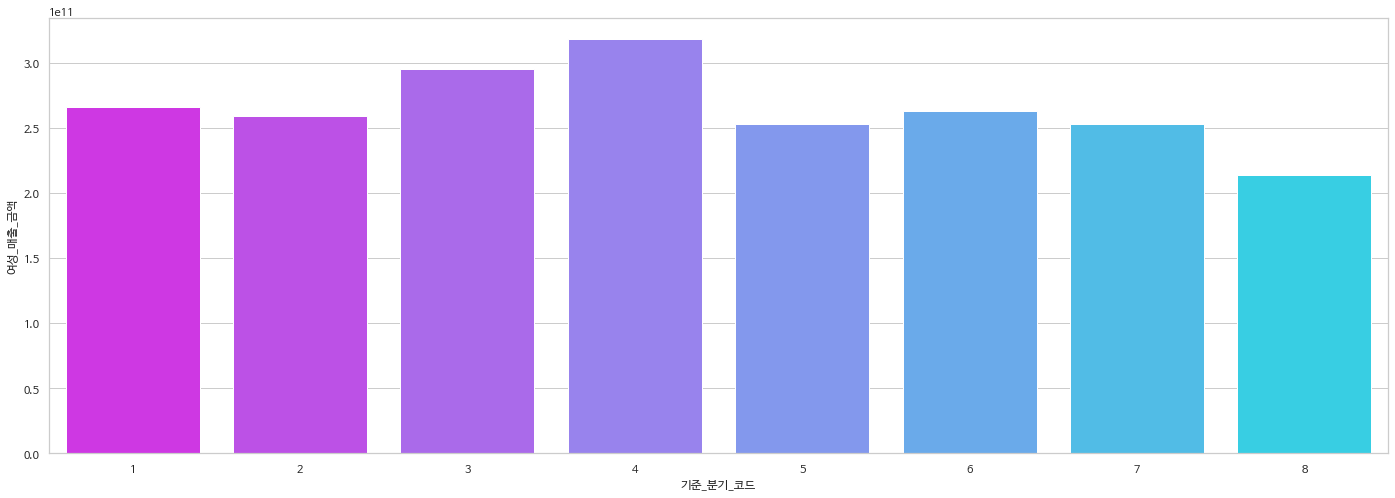

In [35]:
sns.set(font="NanumBarunGothic", 
        # rc={"axes.unicode_minus":False},
        style='whitegrid')
plt.figure(figsize=(24,8))
sns.barplot(
    x='기준_분기_코드',
    y='여성_매출_금액',
    # hue='기준_분기_코드',
    data=pay_M_F,
    ci=None,
    palette = 'cool_r'

)


#그래프 저장
# plt.savefig('',dpi=100)
plt.show()

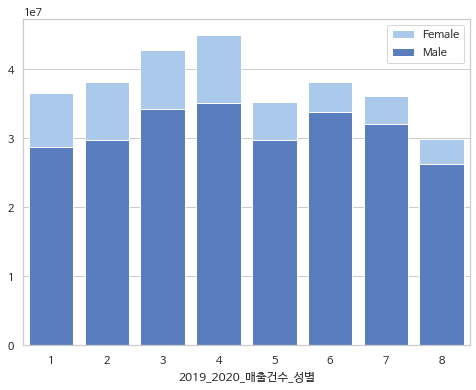

In [36]:
sns.set_theme(font="NanumBarunGothic",style="whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(8,6))


# Plot 
sns.set_color_codes("pastel")
sns.barplot(x="기준_분기_코드", y="여성_매출_건수", data=pay_M_F,
            label="Female", color="b")

# Plot Male where Female was involved
sns.set_color_codes("muted")
sns.barplot(x="기준_분기_코드", y="남성_매출_건수", data=pay_M_F,
            label="Male", color="b")

# Add a legend and informative axis label
ax.legend(ncol=1, loc="upper right", frameon=True)
ax.set( ylabel="",
       xlabel="2019_2020_매출건수_성별")

plt.savefig('/content/data/2019_2020_매출건수_성별',dpi=100)
# sns.despine(left=True, bottom=True)


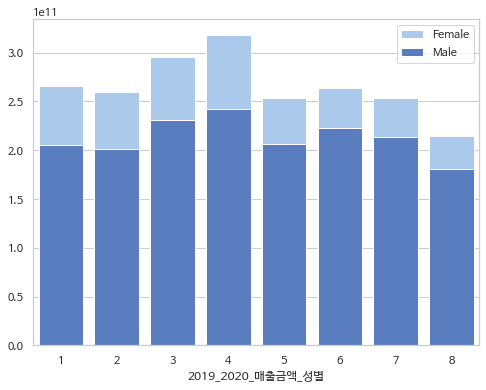

In [37]:
sns.set_theme(font="NanumBarunGothic",style="whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(8,6))


# Plot 
sns.set_color_codes("pastel")
bar1 = sns.barplot(x="기준_분기_코드", y="여성_매출_금액", data=pay_M_F,
            label="Female", color="b")

# Plot Male where Female was involved
bar2 = sns.set_color_codes("muted")
sns.barplot(x="기준_분기_코드", y="남성_매출_금액", data=pay_M_F,
            label="Male", color="b")

# Add a legend and informative axis label
# bars = bar1 + bar2
# labels = [l.get_label() for l in bars]
ax.legend( ncol=1, loc="upper right", frameon=True)
ax.set( ylabel="",
       xlabel="2019_2020_매출금액_성별")
plt.savefig('/content/data/2019_2020_매출금액_성별',dpi=100)
plt.show()


# sns.despine(left=True, bottom=True)

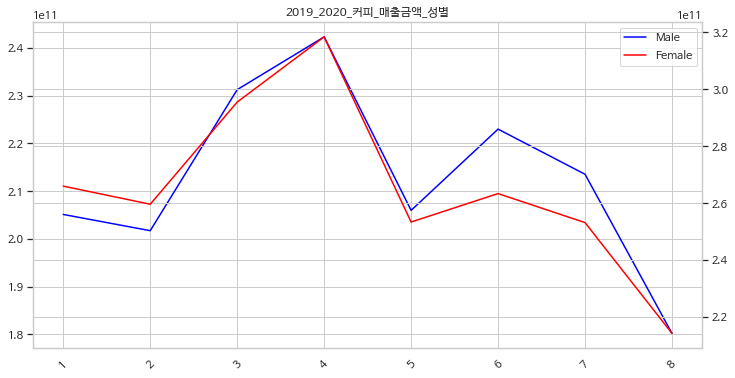

In [38]:
fig, ax1 = plt.subplots(figsize=(12, 6))

bar1 = ax1.plot(pay_M_F['기준_분기_코드'], pay_M_F['남성_매출_금액'], color='blue', label='Male')
plt.xticks(rotation=45)

ax2 = ax1.twinx()
bar2 = ax2.plot(pay_M_F['기준_분기_코드'], pay_M_F['여성_매출_금액'], color='red', label='Female')
plt.xticks(rotation=45)

bars = bar1 + bar2
labels = [l.get_label() for l in bars]
ax1.legend(bars, labels, loc='upper right')

plt.title('2019_2020_커피_매출금액_성별')
plt.savefig('/content/data/2019_2020_커피_매출금액_성별',dpi=100)
plt.show()



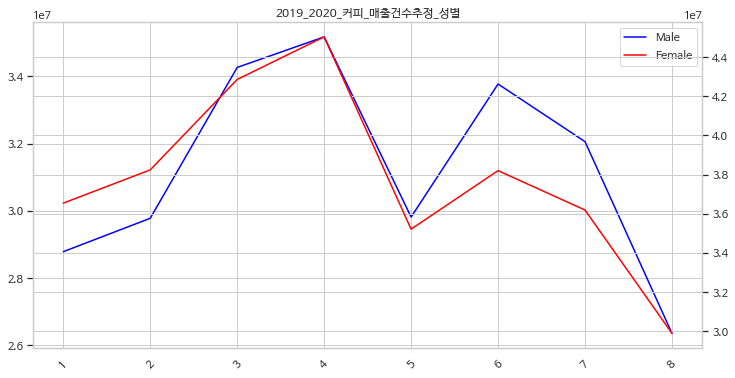

In [39]:

fig, ax1 = plt.subplots(figsize=(12, 6))

bar1 = ax1.plot(pay_M_F['기준_분기_코드'], pay_M_F['남성_매출_건수'], color='blue', label='Male')
plt.xticks(rotation=45)

ax2 = ax1.twinx()
bar2 = ax2.plot(pay_M_F['기준_분기_코드'], pay_M_F['여성_매출_건수'], color='red', label='Female')
plt.xticks(rotation=45)

bars = bar1 + bar2
labels = [l.get_label() for l in bars]
ax1.legend(bars, labels, loc='upper right')

plt.title('2019_2020_커피_매출건수추정_성별')

plt.savefig('/content/data/2019_2020_커피_매출건수추정_성별',dpi=100)
plt.show()


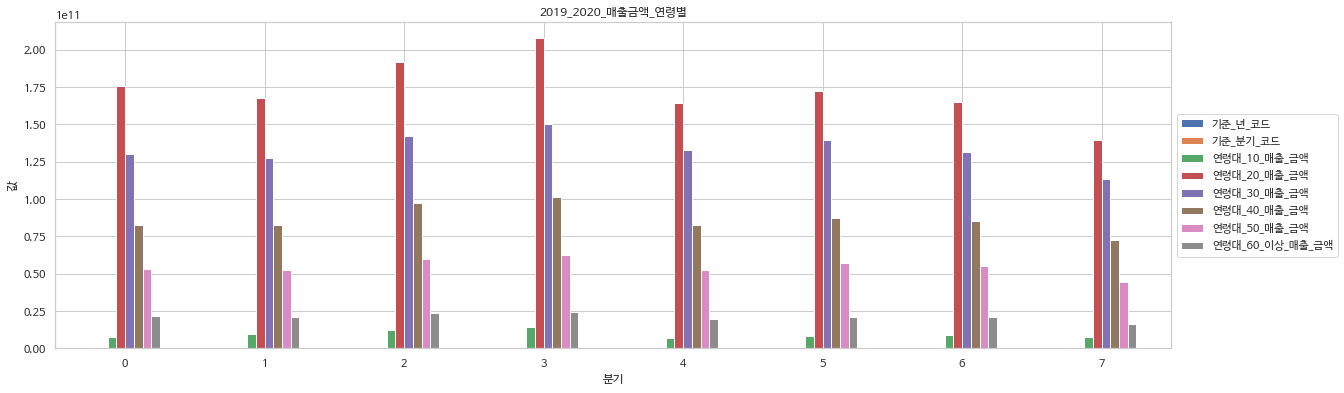

In [40]:
sns.set_theme(font="NanumBarunGothic",style="whitegrid")
pay_age.plot.bar(figsize=(20, 6),rot=0)
plt.title("2019_2020_매출금액_연령별")
plt.xlabel("분기")
plt.ylabel("값")
# plt.ylim(0, 7)
plt.legend(loc='center left', bbox_to_anchor=(1,0.5))
plt.savefig('/content/data/2019_2020_매출금액_연령별',dpi=100)
plt.show()

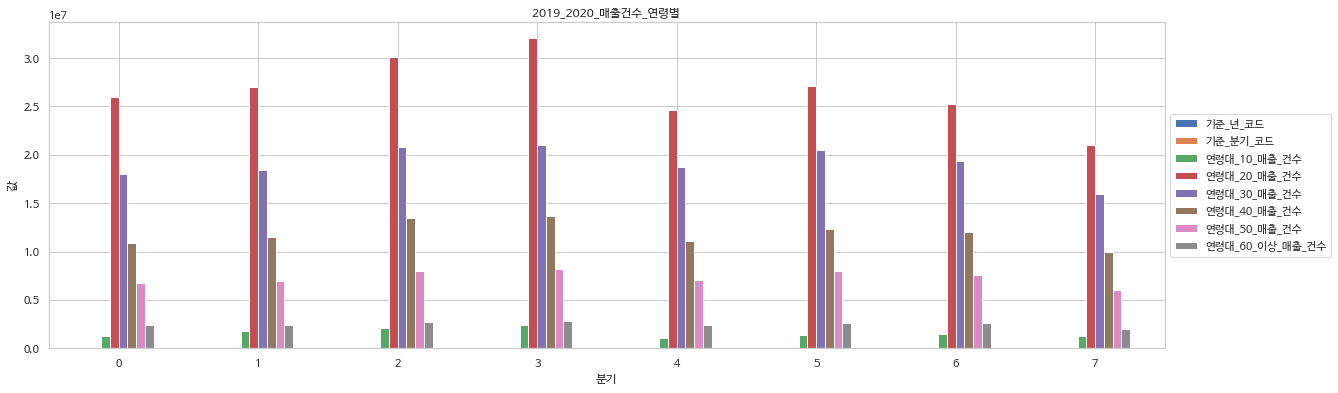

In [41]:
sns.set_theme(font="NanumBarunGothic",style="whitegrid")
pay_age_cou.plot.bar(figsize=(20, 6),rot=0)
plt.title("2019_2020_매출건수_연령별 ")
plt.xlabel("분기")
plt.ylabel("값")
# plt.ylim(0, 7)
plt.legend(loc='center left', bbox_to_anchor=(1,0.5))
plt.savefig('/content/data/2019_2020_매출건수_연령별',dpi=100)
plt.show()

In [144]:
pay_age = pay_age.drop(['서비스_업종_코드_명'], axis=1)

In [78]:
pay_age_cou = pay_age_cou.drop(['서비스_업종_코드_명'], axis=1)

In [98]:
pay_age_cou

,기준_년_코드,기준_분기_코드,연령대_10_매출_건수,연령대_20_매출_건수,연령대_30_매출_건수,연령대_40_매출_건수,연령대_50_매출_건수,연령대_60_이상_매출_건수
0,2019,1,1231316,25996268,18048055,10908370,6745293,2391306
1,2019,2,1754752,26985429,18418010,11483676,6986292,2385974
2,2019,3,2063005,30104942,20765196,13453960,8023710,2709448
3,2019,4,2365818,32111011,21033332,13698880,8215481,2780491
4,2020,5,1069527,24682051,18733455,11085448,7023490,2428881
5,2020,6,1369778,27139766,20506283,12338646,7969882,2646352
6,2020,7,1436025,25285507,19361851,12028677,7565626,2564299
7,2020,8,1246908,21001573,16001714,9997560,6028396,1960599


In [145]:
payment = pay_age.iloc[ :8, 2:]
payment = payment.set_index(pay_age_cou['기준_분기_코드'])
payment

,연령대_10_매출_금액,연령대_20_매출_금액,연령대_30_매출_금액,연령대_40_매출_금액,연령대_50_매출_금액,연령대_60_이상_매출_금액
기준_분기_코드,,,,,,
1,7652795092,176040622701,130396455416,8.251699e+10,52867005363,21527689171
2,9593838693,168030751037,127616603206,8.270705e+10,52169694212,21118153037
3,12311842605,191628053990,142402672446,9.709924e+10,59564070501,23689326124
4,14071396039,208194419380,150358632695,1.011318e+11,62533799452,24379325692
5,6736563540,164664881647,132680970752,8.254536e+10,52636805113,19968853804
6,8075502278,172247187600,139651321811,8.762349e+10,57495897854,21160684453
7,9153313457,164819741189,131344635453,8.546353e+10,54832416485,20980926862
8,7842962104,139729877352,113474599361,7.270653e+10,44193250257,16358640545


In [134]:
cou = pay_age_cou.iloc[ :8, 2:]
cou = cou.set_index(pay_age_cou['기준_분기_코드'])
cou

,연령대_10_매출_건수,연령대_20_매출_건수,연령대_30_매출_건수,연령대_40_매출_건수,연령대_50_매출_건수,연령대_60_이상_매출_건수
기준_분기_코드,,,,,,
1,1231316,25996268,18048055,10908370,6745293,2391306
2,1754752,26985429,18418010,11483676,6986292,2385974
3,2063005,30104942,20765196,13453960,8023710,2709448
4,2365818,32111011,21033332,13698880,8215481,2780491
5,1069527,24682051,18733455,11085448,7023490,2428881
6,1369778,27139766,20506283,12338646,7969882,2646352
7,1436025,25285507,19361851,12028677,7565626,2564299
8,1246908,21001573,16001714,9997560,6028396,1960599


In [146]:
# data.reset_index()

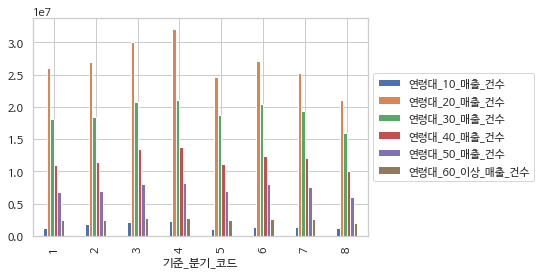

<Figure size 1440x1440 with 0 Axes>

In [141]:

data = DataFrame(data = cou)
data.plot(kind='bar')
 
plt.legend(loc='center left', bbox_to_anchor=(1,0.5))
plt.figure(figsize=(20,20)) 
plt.show()

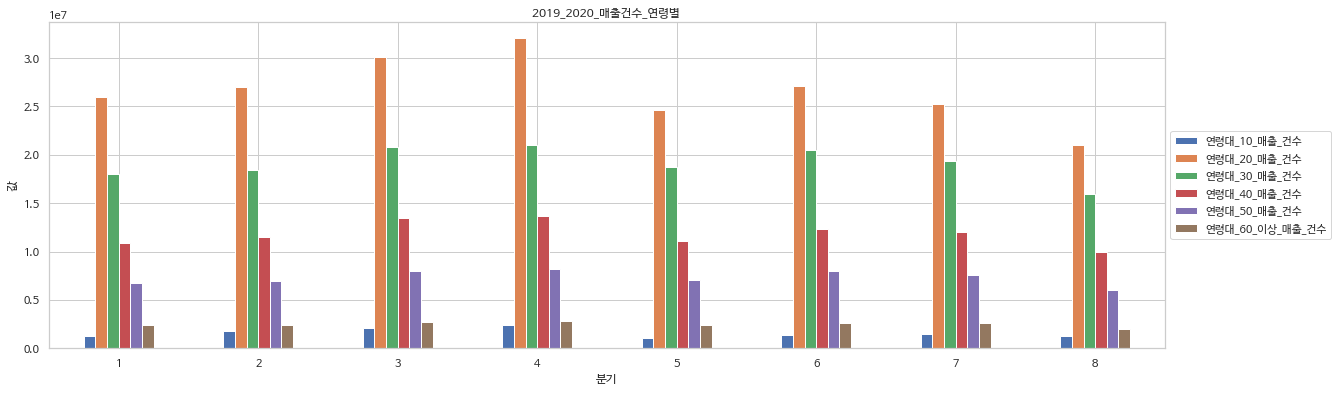

In [142]:
sns.set_theme(font="NanumBarunGothic",style="whitegrid")
cou.plot.bar(figsize=(20, 6),rot=0)
plt.title("2019_2020_매출건수_연령별 ")
plt.xlabel("분기")
plt.ylabel("값")
# plt.ylim(0, 7)
plt.legend(loc='center left', bbox_to_anchor=(1,0.5))
plt.savefig('/content/data/2019_2020_매출건수_연령별_2',dpi=100)
plt.show()

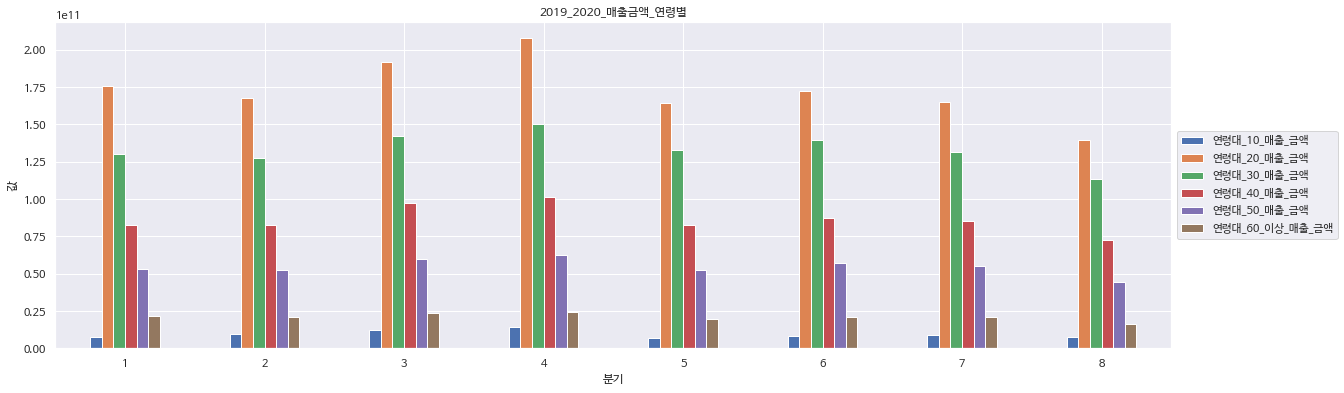

In [147]:
sns.set_theme(font="NanumBarunGothic")
payment.plot.bar(figsize=(20, 6),rot=0)
plt.title("2019_2020_매출금액_연령별")
plt.xlabel("분기")
plt.ylabel("값")
# plt.ylim(0, 7)
plt.legend(loc='center left', bbox_to_anchor=(1,0.5))
plt.savefig('/content/data/2019_2020_매출금액_연령별_2',dpi=100)
plt.show()

In [42]:
# !pip install pyecharts==0.5.11

In [43]:
# import pyecharts

ERROR:lml.utils:failed to import pyecharts_snapshot
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/lml/utils.py", line 43, in do_import
    plugin_module = __import__(plugin_module_name)
ModuleNotFoundError: No module named 'pyecharts_snapshot'


In [44]:
T

,index,0,1
0,월요일_매출_비율,14.20,14.40
1,화요일_매출_비율,14.00,12.20
2,수요일_매출_비율,13.95,13.00
3,목요일_매출_비율,13.55,14.15
4,금요일_매출_비율,14.35,14.90
5,토요일_매출_비율,15.65,16.55
6,일요일_매출_비율,14.70,15.15


In [45]:
# from pyecharts import Pie
# pie = Pie("pie chart", title_pos="center", width=600)
# pie.add("2019", T['index'], T[0], center=[25, 50], is_random=True, radius=[30, 75])
# pie.add("2020", T['index'], T[1], center=[75, 50], is_randome=True, radius=[30, 75])
# pie

In [149]:
T['index'] = ['월요일','화요일','수요일','목요일','금요일','토요일','일요일']
labels = T['index']

In [150]:
labels

0    월요일
1    화요일
2    수요일
3    목요일
4    금요일
5    토요일
6    일요일
Name: index, dtype: object

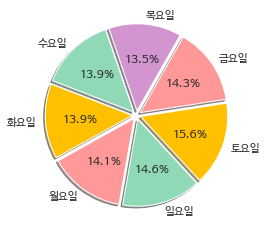

In [151]:
import matplotlib.pyplot as plt

explode = [0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05]
colors = ['#ff9999', '#ffc000', '#8fd9b6', '#d395d0']

plt.pie(T[0], labels=labels, autopct='%.1f%%', startangle=260, counterclock=False, explode=explode, shadow=True, colors=colors)
plt.savefig('/content/data/2019_요일별매출비율',dpi=100)
plt.show()

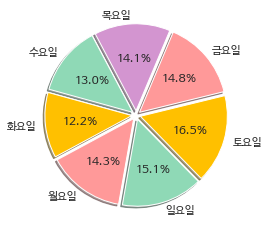

In [152]:
explode = [0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05]
colors = ['#ff9999', '#ffc000', '#8fd9b6', '#d395d0']

plt.pie(T[1], labels=labels, autopct='%.1f%%', startangle=260, counterclock=False, explode=explode, shadow=True, colors=colors)
plt.savefig('/content/data/2020_요일별매출비율',dpi=100)
plt.show()

In [153]:
T_time['index'] = ['00~06시','06~11시','11~14시','14~17시','17~21시','21~24시']
labels = T_time['index']

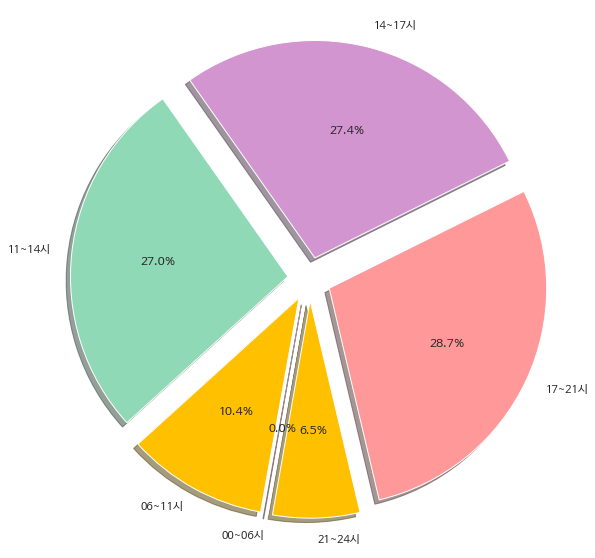

In [156]:

explode = [0.1, 0.1, 0.1, 0.1, 0.1, 0.1]
colors = ['#ff9999', '#ffc000', '#8fd9b6', '#d395d0']

plt.figure(figsize=(10,10)) 
plt.pie(T_time[0], labels=labels, autopct='%.1f%%', startangle=260, counterclock=False, explode=explode, shadow=True, colors=colors,)
plt.savefig('/content/data/2019_시간별매출비율',dpi=100)
plt.show()

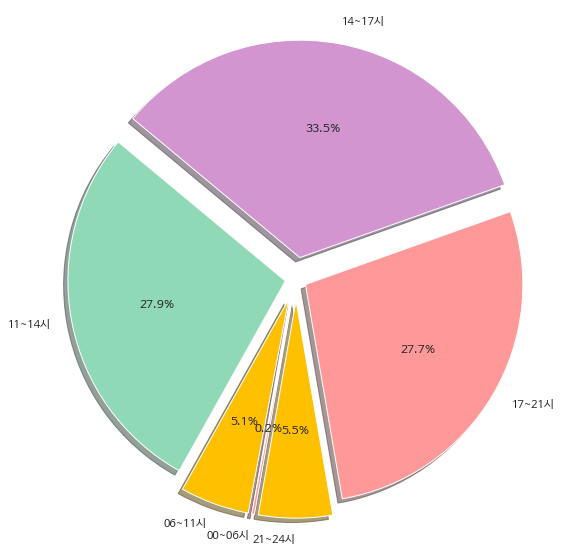

In [155]:

explode = [0.1, 0.1, 0.05, 0.1, 0.05, 0.1]
colors = ['#ff9999', '#ffc000', '#8fd9b6', '#d395d0']

plt.figure(figsize=(10,10)) 
plt.pie(T_time[1], labels=labels, autopct='%.1f%%', startangle=260, counterclock=False, explode=explode, shadow=True, colors=colors,)
plt.savefig('/content/data/2020_시간별매출비율',dpi=100)
plt.show()